In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing as pre
from keras.models import load_model
import seaborn as sns
from tqdm import tqdm

In [2]:

def build_autoencoder(neurons_in=28, act_function="sigmoid", optimizer="adam", hidden_layers=0):
    # Input layer
    input_layer = keras.layers.Input(shape=(28,))


    # Bottleneck layer
    encoded = keras.layers.Dense(neurons_in, activation='relu', name='bottleneck')(input_layer)


    # Output layer
    decoded = keras.layers.Dense(28, activation=act_function, name='decoded')(encoded)

    # Create the model
    autoencoder = keras.Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(loss="binary_crossentropy", optimizer=optimizer)

    return autoencoder

def train_autoencoder(emotion,data_t,data_v, index):

    callbacks = [
        keras.callbacks.EarlyStopping(  
        monitor="val_loss",
        min_delta=0.001,
        patience=40,
        verbose=0,
        mode="auto",
        restore_best_weights=True
        )
    ]
    ae = build_autoencoder(2,"sigmoid","adam",0)
    _X_train = data_t[index]
    _X_val = data_v[index]


    history = ae.fit(_X_train,_X_train,
            validation_data = (_X_val,_X_val),
            epochs=5000,
            batch_size=128,
            verbose=0,
            callbacks = callbacks)


    return ae


def get_representations_re(autoencoder_to_test, encoders, test):

    lab = []

    res = (encoders[autoencoder_to_test].predict(test[autoencoder_to_test], verbose = False))
        # print(len(test[i]))


    features = np.array(res)
    return features


In [3]:
from sklearn.metrics import confusion_matrix
def obtain_cm(y_true, y_pred, labels, name):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(8, 8))
    g = sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, linewidths=.5,  annot_kws={'size': 17})
     
    g.xaxis.set_ticklabels(labels, rotation = 15,fontsize=17)
    g.yaxis.set_ticklabels(labels, rotation = 15,fontsize=17)
    g.set_xlabel("Predicted Label", fontsize=17)
    g.set_ylabel("True Label", fontsize = 17)
    plt.tight_layout()
    plt.show()
    g.figure.savefig(name)

# g.set_title(data, fontsize = 18

from sklearn.metrics import mean_squared_error

def obtain_predictions(test, autoencoders):
    y_true = []

    y_pred = []
    errors = []
    _test = []
    for n in range(len(test)):
        _test.append(test[n].to_numpy())
    for n in tqdm(range(len(df))):
        X_test = _test[n]
        cls = []

        for i in (range(len(X_test))):
            _er = []
            for encoder in autoencoders:
            #print(labels[x])
                _er.append(mean_squared_error(X_test[i],encoder.predict(X_test[i].reshape(-1,88), verbose=0).reshape(88,)))
            errors.append(_er)
            y_pred.append(np.argmin(_er))
            y_true.append(n)
    return errors, y_true, y_pred

    #pred.append(cls)
    # print(cls)




In [4]:
def mean_diff(arrays):
    max_length = max(arr.shape[0] for arr in arrays)

    padded_arrays = []
    for arr in arrays:
        pad_length = max_length - arr.shape[0]
        padded = np.pad(arr, ((0, pad_length), (0, 0)), mode='constant', constant_values=np.nan)
        padded_arrays.append(padded)

    stacked_arrays = np.stack(padded_arrays, axis=0)  
    averaged_array = np.nanmean(stacked_arrays, axis=0)
    return stacked_arrays, averaged_array


In [5]:
def get_emo_df(emotion, dataframe):
    emo = []
    tot = 0
    print(f"Processing {emotion} ...")
    for id, name in zip(dataframe["filename"],dataframe["label"]):
        if f"{emotion}" in name:
            emo.append(id)
            tot += 1
    print(f"Processed {tot} file for {emotion}")


    mask = dataframe['filename'].isin(emo)
    emo_df = dataframe[mask].reset_index()
    emo_df = emo_df.drop(['index'], axis=1)
    return emo_df


In [6]:
def get_data(df,seed):
    X = pd.concat(df["features"].tolist(), ignore_index=True)
    _X= (X-X.min())/(X.max()-X.min())
    


    X_train, X_test = train_test_split(_X, test_size=.2, random_state=seed)
    X_train, X_val = train_test_split(X_train, test_size=.1, random_state=seed)
    # print(len(X_train), len(X_val), len(X_test))
    return X_train, X_val, X_test

In [15]:
clear_df = pd.read_pickle("../utils/data/clear_demos.pkl")
seed = 82
# clear_df = pd.read_pickle("../utils/data/clear_functional_emovo.pkl")
# seed = 10
# clear_df = pd.read_pickle("../utils/data/clear_emozionalmente.pkl")
# seed = 47

# clear_df = pd.read_pickle("../utils/data/pitch_functional_demos.pkl")
# clear_df = pd.read_pickle("../utils/data/pitch_functional_emovo.pkl")
lab = clear_df["label"].unique()
lab

array(['disgust', 'joy', 'neutrality', 'fear', 'anger', 'surprise',
       'sadness', 'guilt'], dtype=object)

In [16]:
emo = []
tot = 0
neutrality_df = clear_df[clear_df['label'] == 'neutrality']
neutrality_df


for id, name in zip(clear_df["filename"],clear_df["label"]):
    if "PR" in id:
        emo.append(id)
        


mask = clear_df['filename'].isin(emo)
emo_df = clear_df[mask].reset_index()
emo_df = emo_df.drop(['index'], axis=1)

clear_df = emo_df



In [17]:
df = []

for i,emotion in enumerate(lab):
    if emotion == "neutrality":
        df.append(neutrality_df)
    else:
        df.append(get_emo_df(emotion,clear_df))

Processing disgust ...
Processed 140 file for disgust
Processing joy ...
Processed 167 file for joy
Processing fear ...
Processed 177 file for fear
Processing anger ...
Processed 246 file for anger
Processing surprise ...
Processed 203 file for surprise
Processing sadness ...
Processed 421 file for sadness
Processing guilt ...
Processed 209 file for guilt


In [9]:
df = []

for i,emotion in enumerate(lab):
    df.append(get_emo_df(emotion,clear_df))

Processing disgust ...
Processed 140 file for disgust
Processing joy ...
Processed 167 file for joy
Processing neutrality ...
Processed 0 file for neutrality
Processing fear ...
Processed 177 file for fear
Processing anger ...
Processed 246 file for anger
Processing surprise ...
Processed 203 file for surprise
Processing sadness ...
Processed 421 file for sadness
Processing guilt ...
Processed 209 file for guilt


In [18]:
train = []
val = []
test = []
print(seed)
for data in df:
    tr, v, te = get_data(data, seed)
    train.append(tr)
    val.append(v)
    test.append(te)

82


In [19]:
def load_models(model_path,labels, i ):
    model = (model_path + labels[i] + ".keras")
    print(model)
    return load_model(model)

In [20]:
EMOVO_model_path = "../utils/paper/models/EMOVO/ae_"
DEMoS_model_path = "../utils/paper/models/DEMoS/ae_"
DEMoS1_model_path = "../utils/paper/models/DEMoS2/ae_"
DEMoS1_model_path = "model/autoencoders/test/ae_"

emozionalmente_model_path = "../utils/paper/models/emozionalmente/ae_"

autoencoders = []
for i,emotion in enumerate(lab):
    autoencoders.append(load_models(DEMoS1_model_path, lab, i))

model/autoencoders/test/ae_disgust.keras
model/autoencoders/test/ae_joy.keras
model/autoencoders/test/ae_neutrality.keras
model/autoencoders/test/ae_fear.keras
model/autoencoders/test/ae_anger.keras
model/autoencoders/test/ae_surprise.keras
model/autoencoders/test/ae_sadness.keras
model/autoencoders/test/ae_guilt.keras


100%|██████████| 7/7 [00:30<00:00,  4.34s/it]


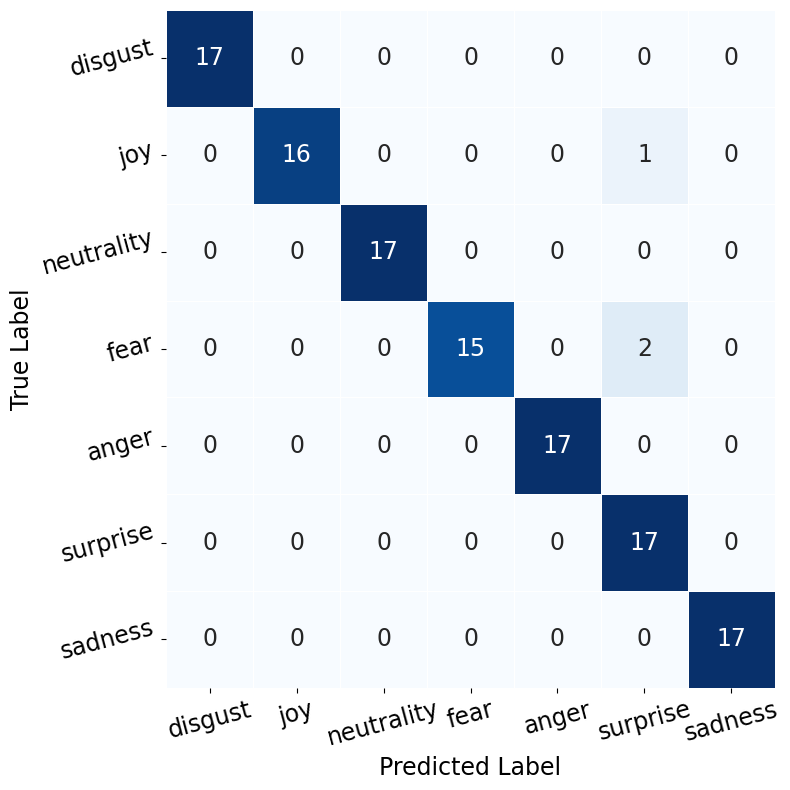

In [19]:
errors, y_true, y_pred = obtain_predictions(test, autoencoders)
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
    
# lab = ['disgust', 'joy', 'neutrality', 'fear', 'anger', 'surprise','sadness', "guilt"]
errors, y_true, y_pred = obtain_predictions(test, autoencoders)
obtain_cm(y_true, y_pred, lab, "EMOVO_Test_CM")   

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
7/7 ━━━━━━━━━━━━━

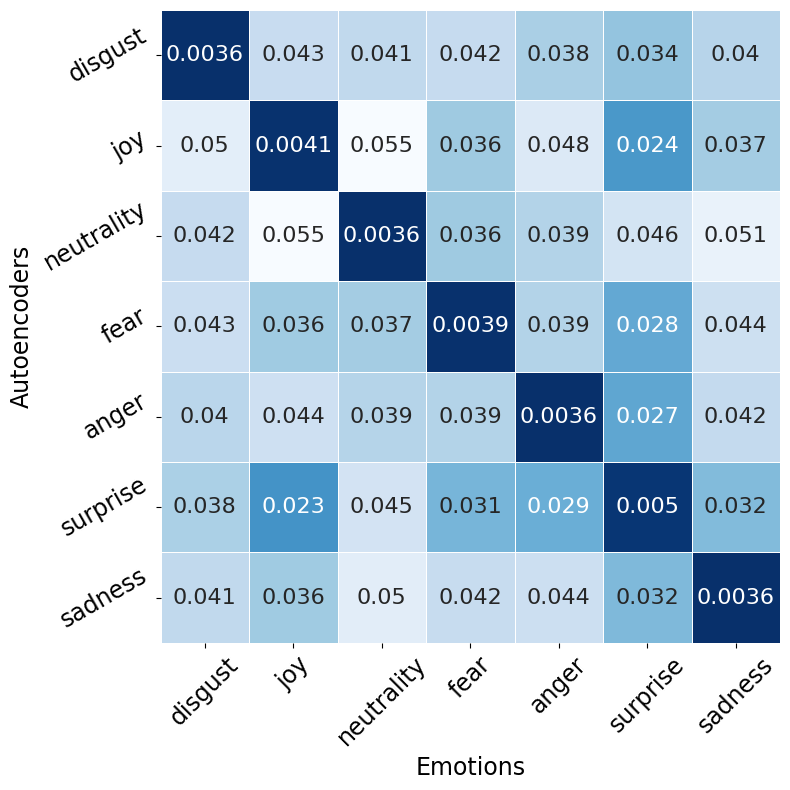

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_rec_error(ae, seed, flag,labels):
    errors = {}
    for i in labels:
        errors[i] = None
    for i in range(len(labels)):
        data = df[i]
        _X_train, _X_val, _X_test = get_data(data, seed)
        if flag:
            _X_test = _X_train
        reconstructed_X = ae.predict(_X_test)
        errors[labels[i]] = mean_squared_error(_X_test,reconstructed_X)
        # mse_per_feature = ((_X_test - reconstructed_X)**2).mean(axis=0)
        # errors[labels[i]] = np.mean(mse_per_feature)
    return errors
        
# lab = ['disgust', 'joy', 'neutrality', 'fear', 'anger', 'surprise','sadness', 'guilt']

dict_errors = {}
for i in lab:
    dict_errors[i] = None
for i in range(len(autoencoders)):
    dict_errors[lab[i]] = get_rec_error(autoencoders[i], seed,0, lab)

table = pd.DataFrame.from_dict(dict_errors, orient='index')
fig = plt.figure(facecolor='w', edgecolor='k', figsize=(8, 8))
ax = sns.heatmap(table, annot=True, cmap='Blues_r', cbar=False, linewidths=.5, annot_kws={'size': 16}) 
ax.set_xlabel('Emotions', fontsize=17)
ax.set_ylabel('Autoencoders', fontsize=17)
ax.xaxis.set_tick_params(labelsize=17, rotation=45)  
ax.yaxis.set_tick_params(labelsize=17, rotation= 30)  
plt.tight_layout()
plt.savefig('Emozionalmente_Training_errors.png')

In [21]:
encoders = []
for autoencoder in autoencoders:
    bottleneck_layer = autoencoder.layers[1]
    input_layer = autoencoder.layers[0]

    # Create a new model
    encoder = keras.Model(inputs=input_layer.output ,outputs=bottleneck_layer.output)
    encoders.append(encoder)

In [22]:
re_test = []
re_train = []
re_val = []
for i in range(len(encoders)):
    re_test.append(get_representations_re(i, encoders, test))
    re_train.append(get_representations_re(i, encoders, train))
    re_val.append(get_representations_re(i, encoders, val))


In [23]:
from tqdm import tqdm
trained_ae = []
for i,emotion in tqdm(enumerate(lab)):
    trained_ae.append(train_autoencoder(emotion, re_train, re_val, i))
# 

encoders = []
for autoencoder in trained_ae:
    bottleneck_layer = autoencoder.layers[1]
    input_layer = autoencoder.layers[0]

    # Create a new model
    encoder = keras.Model(inputs=input_layer.output ,outputs=bottleneck_layer.output)
    encoders.append(encoder)


for i,ae in enumerate(encoders):
    name = "model/re_train/DEMOS1/ae_" + lab[i] + ".keras"
    # name 
    ae.save(name)

8it [27:12, 204.08s/it]


In [23]:
for i,ae in enumerate(encoders):
    name = "model/re_train/DEMOS1/ae_" + lab[i] + ".keras"
    # name 
    ae.save(name)

In [30]:
# EMOVO_model_path = "../utils/paper/models/EMOVO/ae_"
# DEMoS_model_path = "../utils/paper/models/DEMoS/ae_"
EMOVO_retrain_path = "model/re_train/EMOVO/ae_"
EMOVO_sig_retrain_path = "model/re_train/EMOVO_sig/ae_"
EMOVO_tanh_retrain_path = "model/re_train/EMOVO_tanh/ae_"
DEMoS_retrain_path = "model/re_train/DEMoS/ae_"
emozionalmente_retrain_path = "model/re_train/emozionalmente/ae_"


re_encoders = []
for i,emotion in enumerate(lab):
    re_encoders.append(load_models(EMOVO_retrain_path, lab, i))

model/re_train/EMOVO/ae_disgust.keras
model/re_train/EMOVO/ae_joy.keras
model/re_train/EMOVO/ae_neutrality.keras
model/re_train/EMOVO/ae_fear.keras
model/re_train/EMOVO/ae_anger.keras
model/re_train/EMOVO/ae_surprise.keras
model/re_train/EMOVO/ae_sadness.keras


In [21]:
from tqdm import tqdm
trained_ae = []
for i,emotion in tqdm(enumerate(lab)):
    trained_ae.append(train_autoencoder(emotion, re_train, re_val, i))

0it [00:02, ?it/s]


KeyboardInterrupt: 

100%|██████████| 7/7 [00:33<00:00,  4.80s/it]

0.9747899159663865
0.9751594126594127


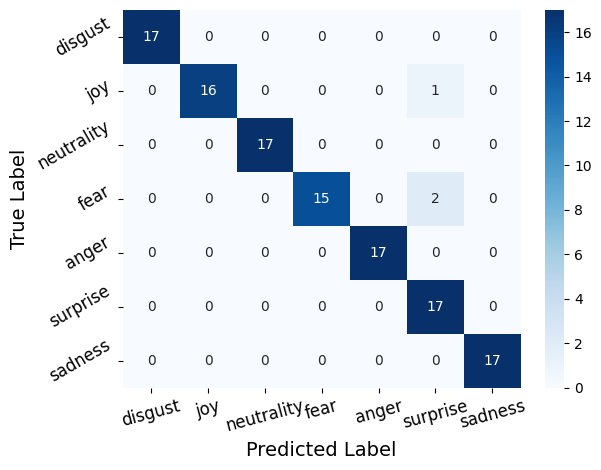

In [24]:
############# TANH
errors, y_true, y_pred = obtain_predictions(test, autoencoders)
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average ="weighted"))

obtain_cm(y_true, y_pred, lab)   

100%|██████████| 7/7 [00:32<00:00,  4.66s/it]

0.9747899159663865
0.9751594126594127


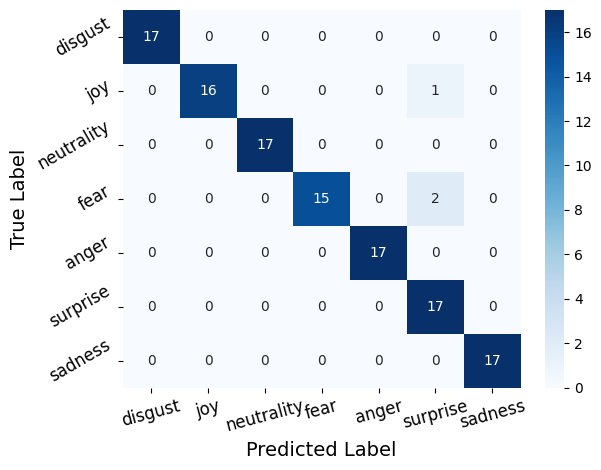

In [20]:
############# SIGMOID
errors, y_true, y_pred = obtain_predictions(test, autoencoders)
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average ="weighted"))

obtain_cm(y_true, y_pred, labels)   

100%|██████████| 7/7 [00:30<00:00,  4.30s/it]

0.9747899159663865
0.9751594126594127


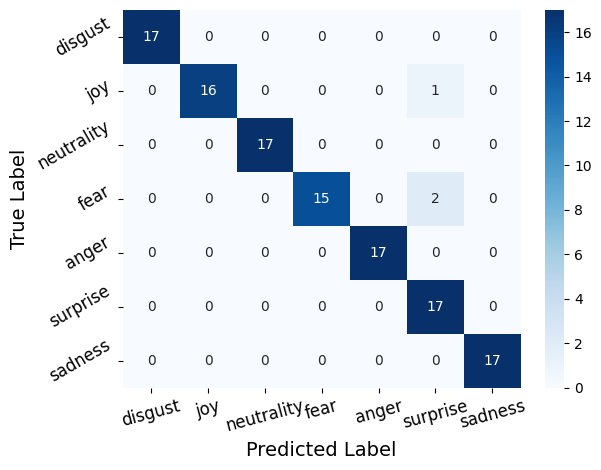

In [24]:
############### RELU
errors, y_true, y_pred = obtain_predictions(test, autoencoders)
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average ="weighted"))

obtain_cm(y_true, y_pred, lab)

In [75]:
def get_representations(autoencoder_to_test, encoders, test):
    res = []
    lab = []
    for i in range(len(test)):
        res.append(encoders[autoencoder_to_test].predict(test[i], verbose = False))
        # print(len(test[i]))
        if i == autoencoder_to_test:
            lab.append([1]* len(test[i]))
        else:
            lab.append([0]* len(test[i]))

    features = np.concatenate(res, axis=0)
    labels = np.concatenate(lab, axis=0)
    return features, labels


In [76]:
tot_features = []
tot_labels = []
for i in range(len(re_encoders)):
    features, labels = get_representations(i, re_encoders, re_test)
    tot_features.append(features)
    tot_labels.append(labels)
# feat = features.reshape(-1,17,2)

In [77]:
tot_target = []
tot_non_target = []

for i in range(len(tot_features)): 

    data_array = tot_features[i]
    mask_array = tot_labels[i]

    tot_target.append(data_array[mask_array == 1])
    tot_non_target.append(data_array[~(mask_array == 1)])

# tot_target = np.array(tot_target)
# tot_non_target = np.array(tot_non_target)

In [78]:
t_features, averaged_1 = mean_diff(tot_target)
nt_features, averaged_2 = mean_diff(tot_non_target)

In [79]:
tot_t_features = []
for i in range(len(t_features)):
    tot_t_features.append(t_features[i][~np.isnan(t_features[i])].reshape(-1,2))


tot_nt_features = []
for i in range(len(nt_features)):
    tot_nt_features.append(nt_features[i][~np.isnan(nt_features[i])].reshape(-1,2))

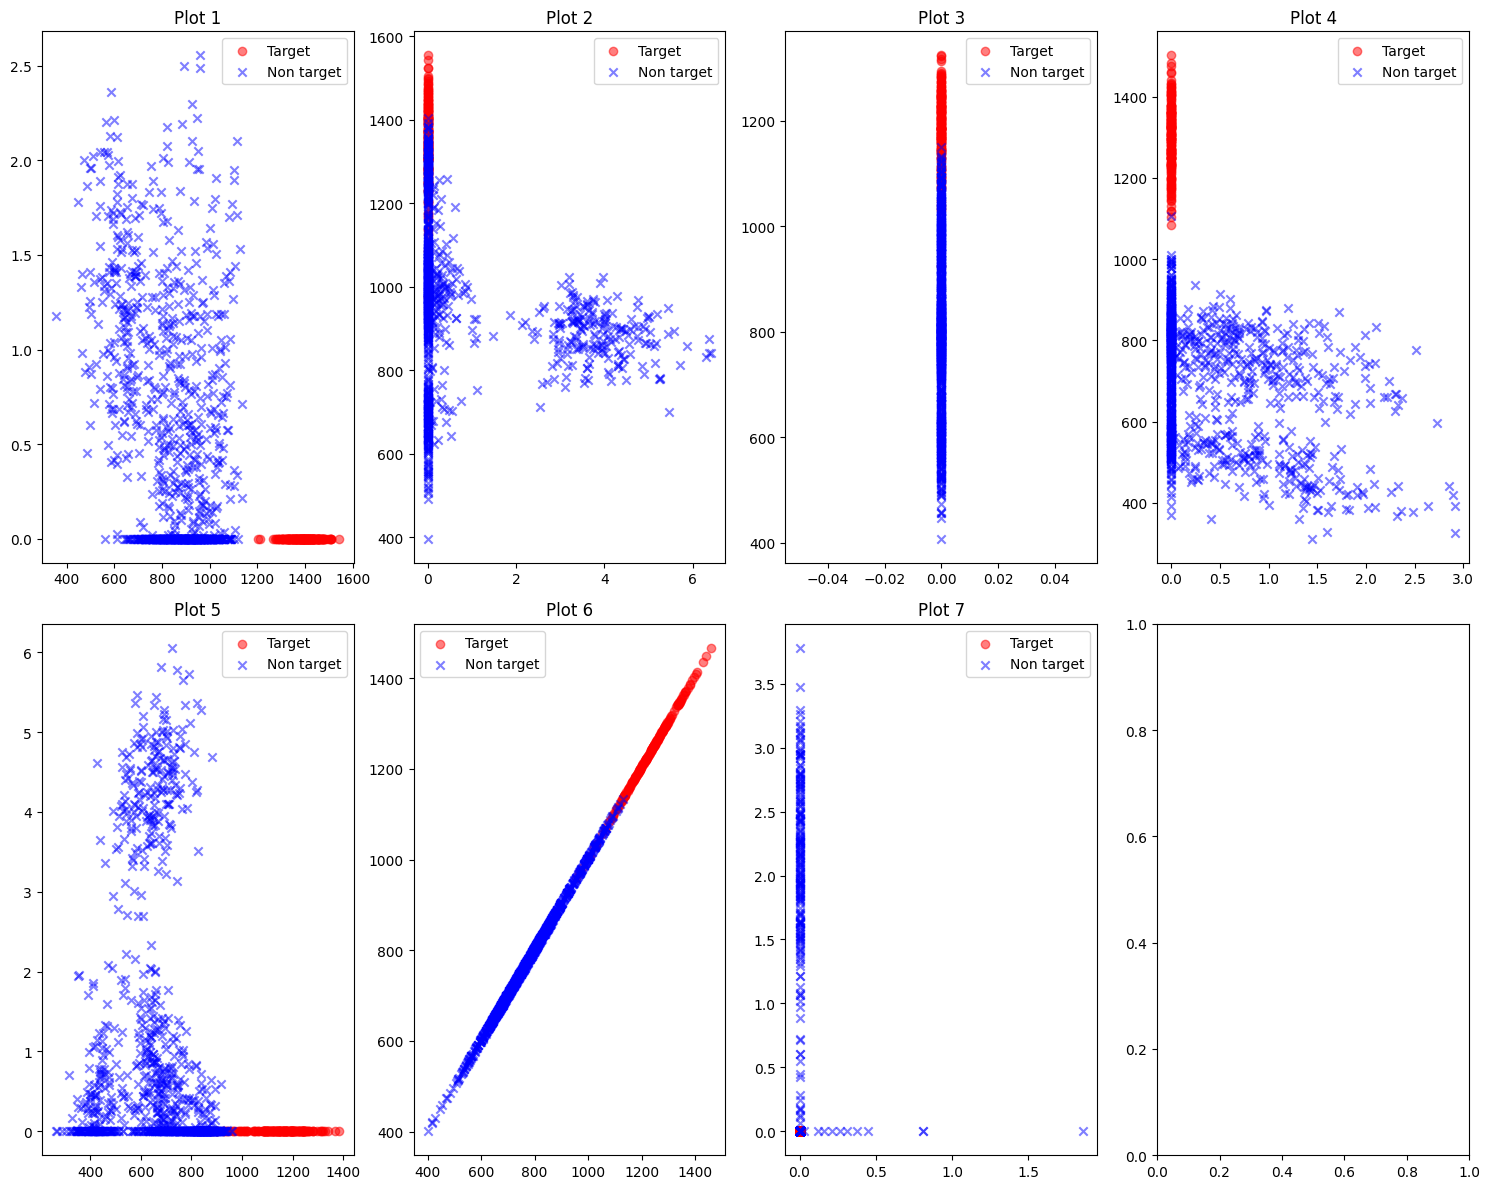

In [25]:
n = len(tot_t_features)
fig, axes = plt.subplots(nrows=2, ncols=(n + 1) // 2, figsize=(15, 12))

for i in range(n):
    row = i // ((n + 1) // 2)
    col = i % ((n + 1) // 2)
    axes[row, col].scatter(tot_t_features[i][:, 0], tot_t_features[i][:, 1], marker="o", color="red", alpha=0.5, label="Target")
    axes[row, col].scatter(tot_nt_features[i][:, 0], tot_nt_features[i][:, 1], marker="x", color="blue", alpha=0.5, label="Non target")
    axes[row, col].legend()
    axes[row, col].set_title(f"Plot {i+1}")

plt.tight_layout()
plt.show()

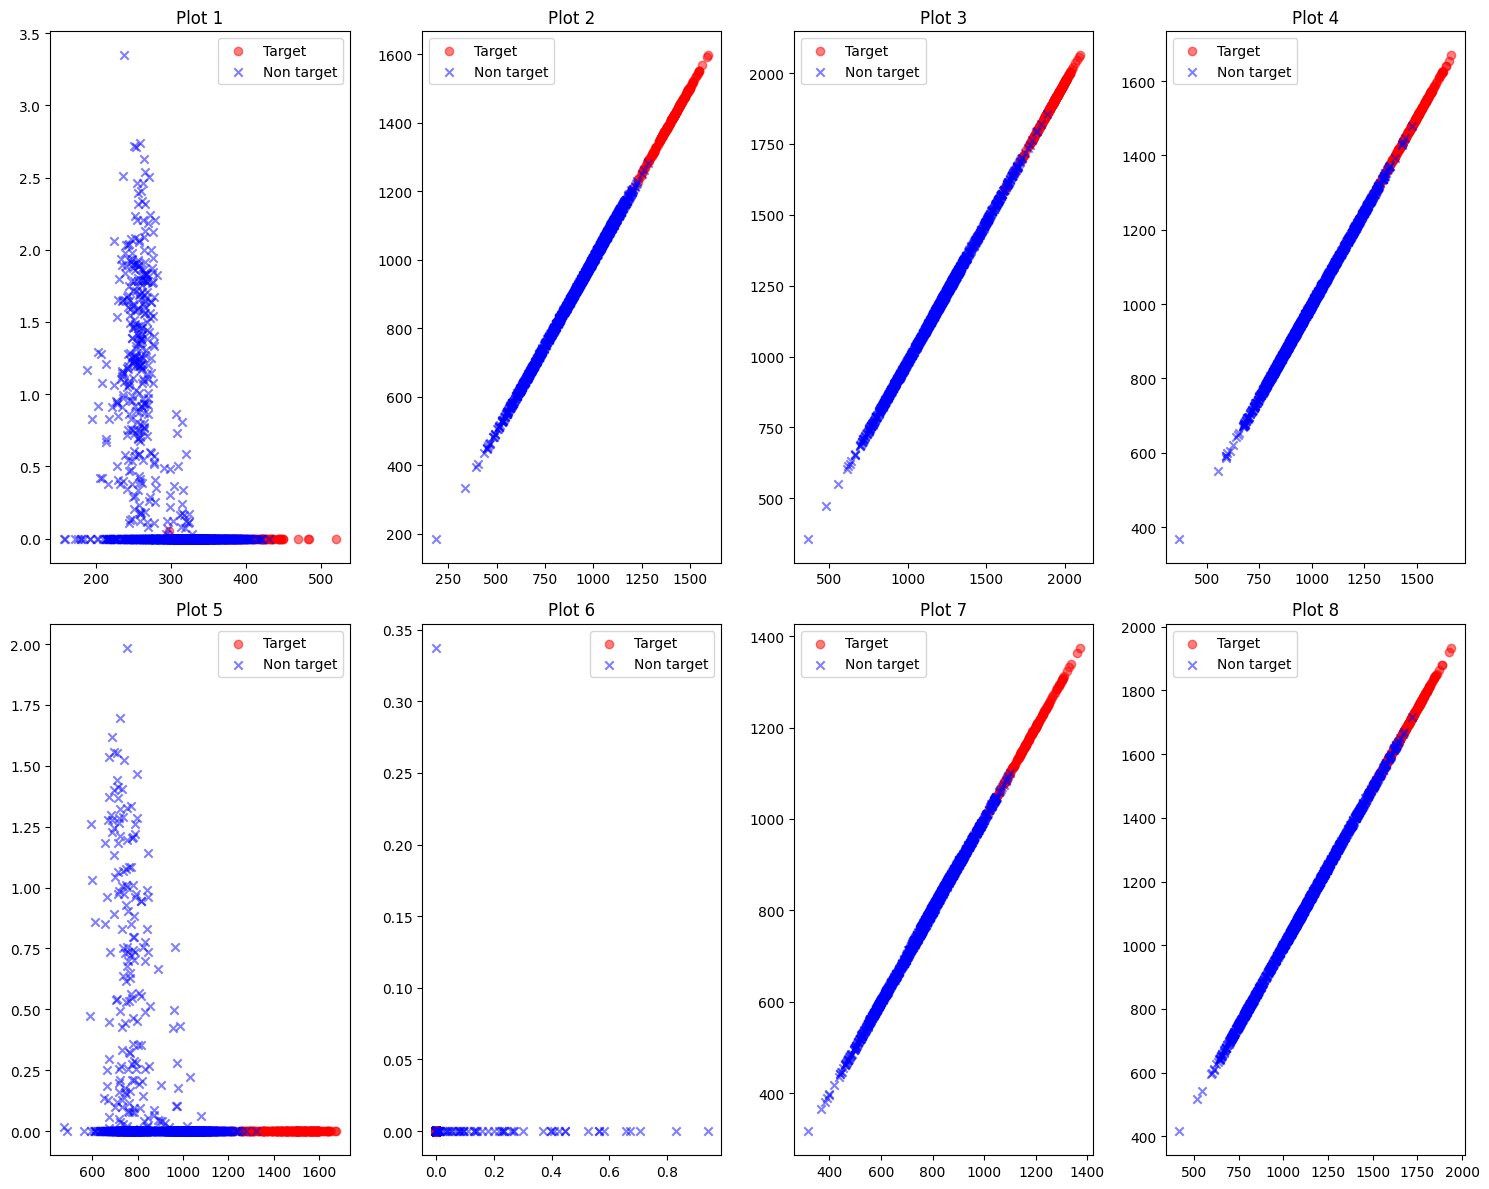

In [20]:
n = len(tot_t_features)
fig, axes = plt.subplots(nrows=2, ncols=(n + 1) // 2, figsize=(15, 12))

for i in range(n):
    row = i // ((n + 1) // 2)
    col = i % ((n + 1) // 2)
    axes[row, col].scatter(tot_t_features[i][:, 0], tot_t_features[i][:, 1], marker="o", color="red", alpha=0.5, label="Target")
    axes[row, col].scatter(tot_nt_features[i][:, 0], tot_nt_features[i][:, 1], marker="x", color="blue", alpha=0.5, label="Non target")
    axes[row, col].legend()
    axes[row, col].set_title(f"Plot {i+1}")

plt.tight_layout()
plt.show()

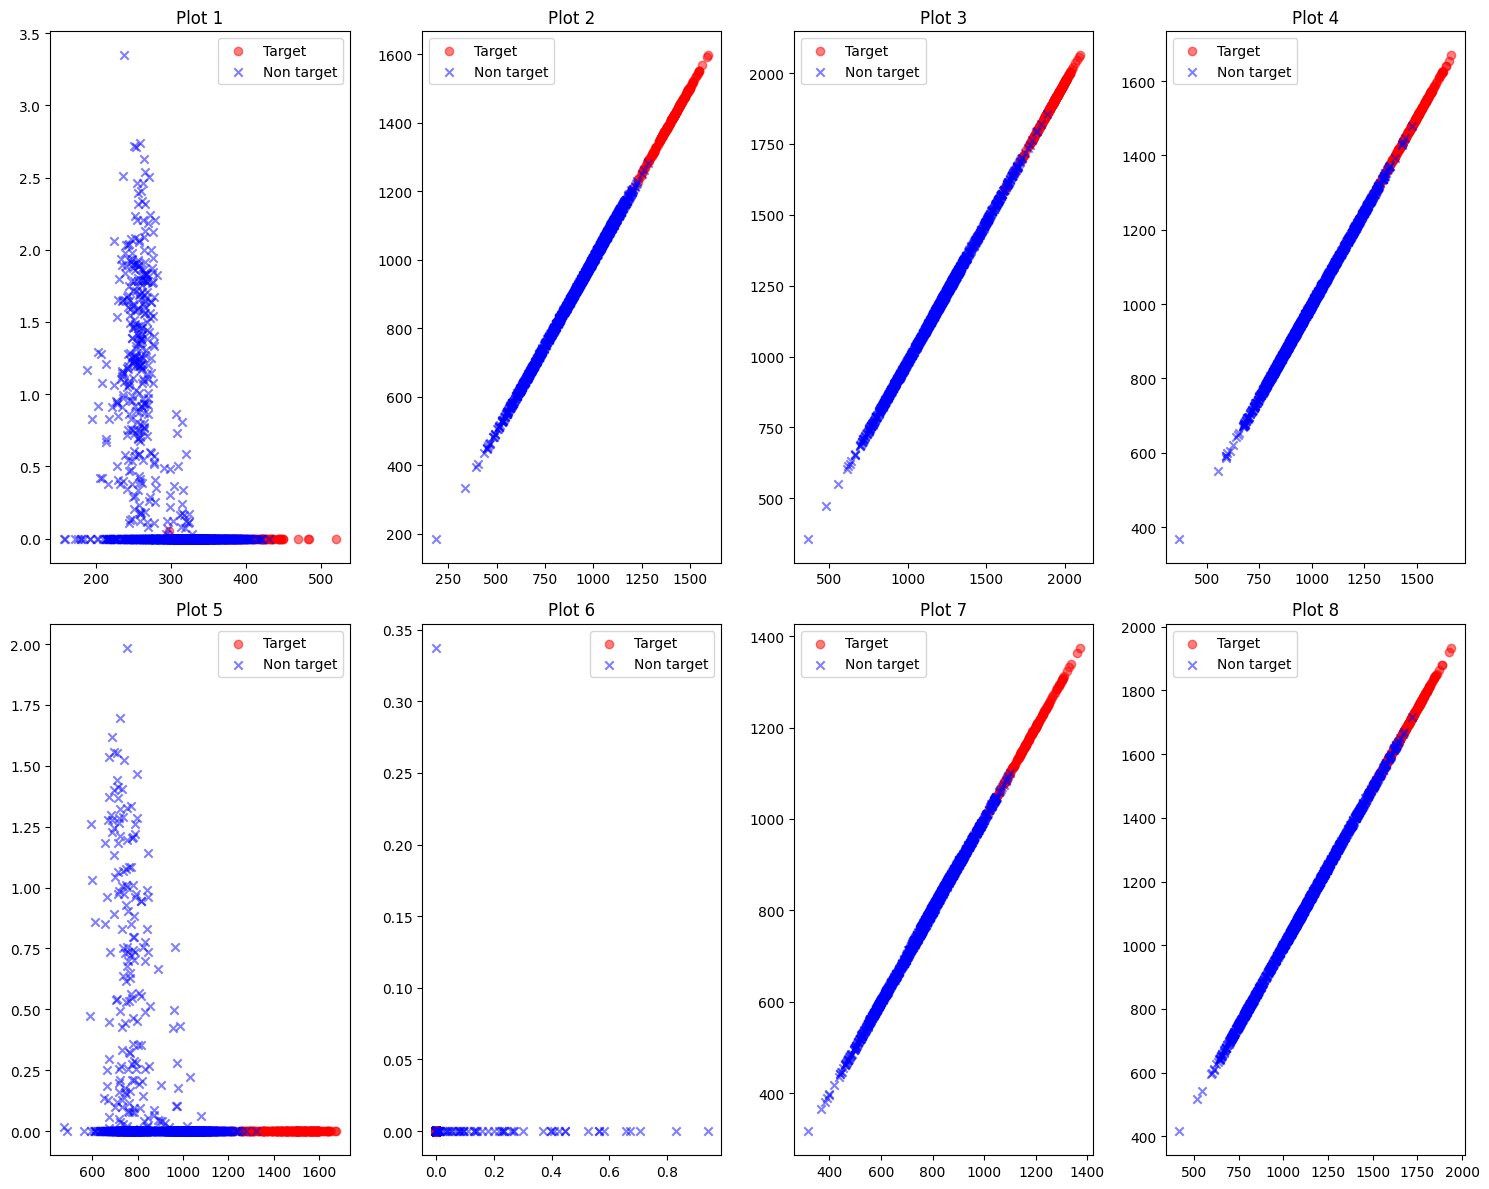

In [35]:
n = t_features.shape[0]
fig, axes = plt.subplots(nrows=2, ncols=(n + 1) // 2, figsize=(15, 12))

for i in range(n):
    row = i // ((n + 1) // 2)
    col = i % ((n + 1) // 2)
    axes[row, col].scatter(t_features[i][:, 0], t_features[i][:, 1], marker="o", color="red", alpha=0.5, label="Target")
    axes[row, col].scatter(nt_features[i][:, 0], nt_features[i][:, 1], marker="x", color="blue", alpha=0.5, label="Non target")
    axes[row, col].legend()
    axes[row, col].set_title(f"Plot {i+1}")

plt.tight_layout()
plt.show()

In [72]:
# from sklearn.decomposition import PCA

# t_features = t_features.reshape(-1,2)
# nt_features = nt_features.reshape(-1,2)

# # Apply PCA on t_features
# pca_t = PCA(n_components=2)
# t_features_pca = pca_t.fit_transform(t_features)

# # Apply PCA on nt_features
# pca_nt = PCA(n_components=2)
# nt_features_pca = pca_nt.fit_transform(nt_features)

# # Plot the PCA results
# plt.figure(figsize=(10, 6))
# plt.scatter(t_features_pca[:, 0], t_features_pca[:, 1], marker="o", color="red", alpha=0.75, label="Target")
# plt.scatter(nt_features_pca[:, 0], nt_features_pca[:, 1], marker="x", color="blue", alpha=0.75, label="Non target")
# plt.legend()
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.title('PCA of Target and Non-target Features')
# plt.tight_layout()
# plt.show()

In [201]:
t_features.shape

(7, 17, 28)

In [27]:
# t_features = t_features.reshape(-1,2)
# nt_features = nt_features.reshape(-1,2)
combined_features = np.concatenate([t_features.reshape(-1,2), nt_features.reshape(-1,2)])

In [82]:
nt_features[5]

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)

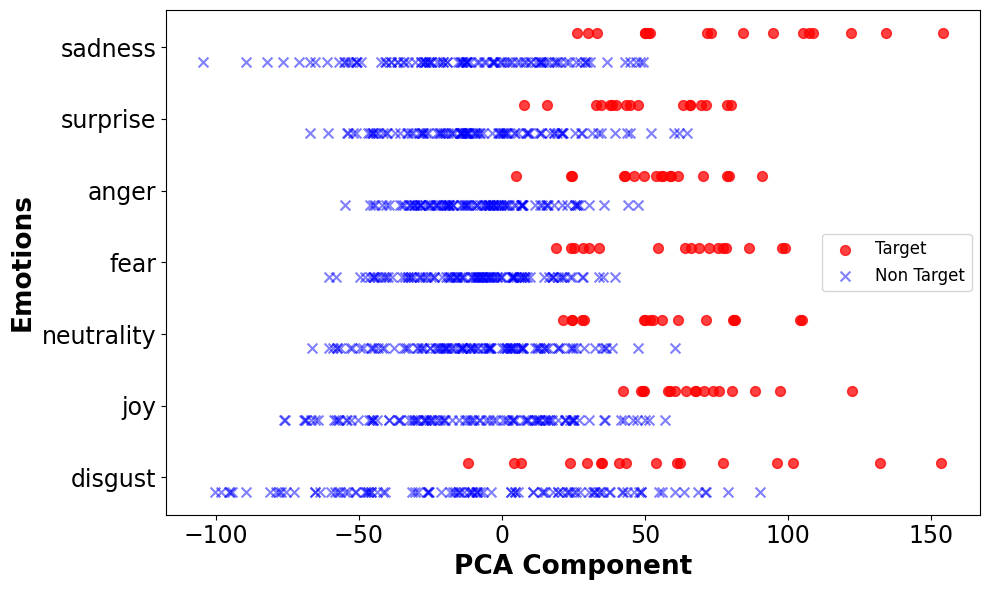

In [118]:
from sklearn.decomposition import PCA
tot = []
dims = []
for n in range(len(tot_t_features)):
    pca_t = PCA(n_components=1)
    dims.append(len(tot_t_features[n]))
    ciolla = np.concatenate([tot_t_features[n], tot_nt_features[n]])
    t_features_pca = pca_t.fit_transform(ciolla)
    t_features_pca = t_features_pca.reshape(ciolla.shape[0], -1)
    tot.append(t_features_pca)
t_features_pca = np.array(tot)

plt.figure(figsize=(10, 6))

for i in range(t_features_pca.shape[0]):
    # Plot the first dims[i] of t_features_pca
    plt.scatter(t_features_pca[i, :dims[i]], [i+1.2] * len(t_features_pca[0, :dims[i]]), marker="o", color="red", alpha=0.75, label="Target" if i == 0 else "", s=50)

    # Plot the remaining t_features_pca
    plt.scatter(t_features_pca[i, dims[i]:], [i+0.8] * len(t_features_pca[0, dims[i]:]), marker="x", color="blue", alpha=0.5, label="Non Target" if i == 0 else "", s=50)
    plt.yticks(range(1, t_features_pca.shape[0] + 1), labels=lab)
    plt.tick_params(axis='both', which='major', labelsize=17)
plt.xlabel('PCA Component', fontsize=19, fontweight='bold')
plt.ylabel('Emotions', fontsize=19, fontweight='bold')
# plt.title('Plot of latent space representations of Target and Non-target features', fontsize=18)
plt.legend(prop={'size': 12})
plt.tight_layout()
plt.savefig("Emovo_sfalzati.png")
plt.show()


In [83]:
target = []
for i in range((t_features_pca.shape[0])):
    target.append(t_features_pca[i, :dims[i]])

In [103]:
(t_features_pca[i, dims[i]:]).shape

(102, 1)

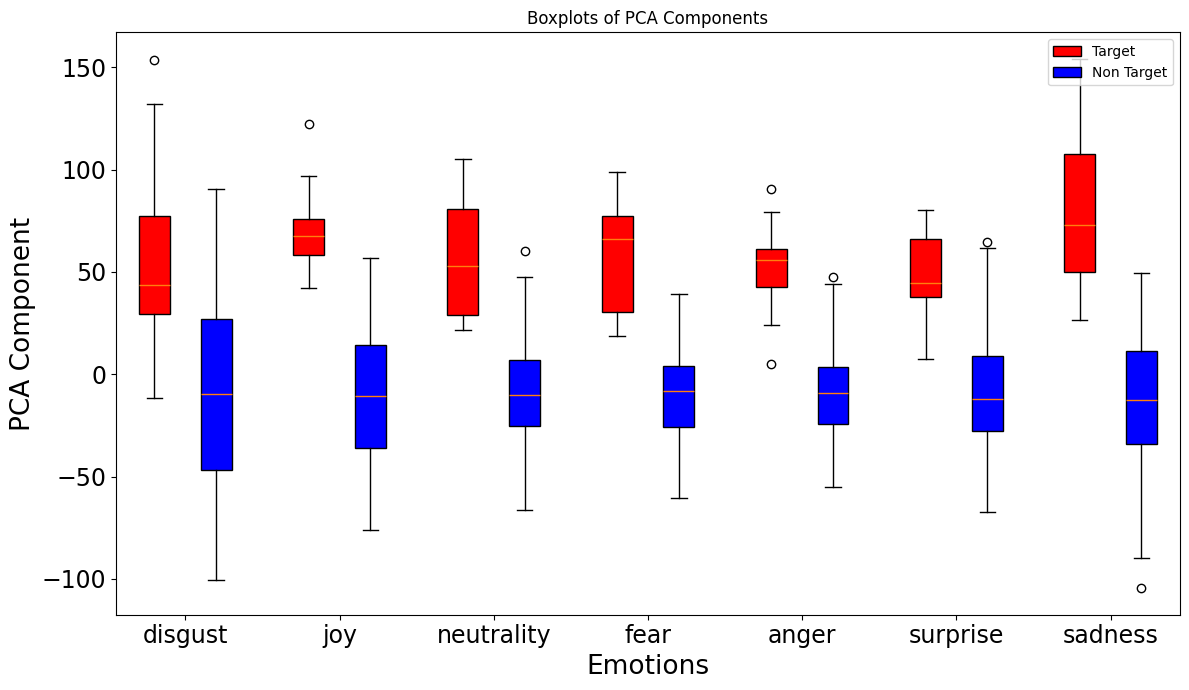

In [119]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Create the boxplots
positions1 = np.arange(len(t_features_pca)) * 2.0 -0.8
positions2 = positions1 + 0.8


target = []
non_target = []
for i in range((t_features_pca.shape[0])):
    target.append(t_features_pca[i, :dims[i]].reshape(t_features_pca[i, :dims[i]].shape[0],))
    non_target.append(t_features_pca[i, dims[i]:].reshape(t_features_pca[i, dims[i]:].shape[0],))



ax.boxplot(target, positions=positions1, widths=0.4, patch_artist=True, boxprops=dict(facecolor="red"), label="Target")
ax.boxplot(non_target, positions=positions2, widths=0.4, patch_artist=True, boxprops=dict(facecolor="blue"), label="Non Target")

# Set the x-axis labels
ax.set_xticks((positions1 + positions2) / 2)
ax.set_xticklabels(lab)
plt.tick_params(axis='both', which='major', labelsize=17)
# Set the labels and title
ax.set_xlabel('Emotions', fontsize=19)
ax.set_ylabel('PCA Component', fontsize=19)
ax.set_title('Boxplots of PCA Components')

plt.legend(loc="upper right")
# Show the plot
plt.tight_layout()
plt.savefig("boxplot_interpret.png")
plt.show()

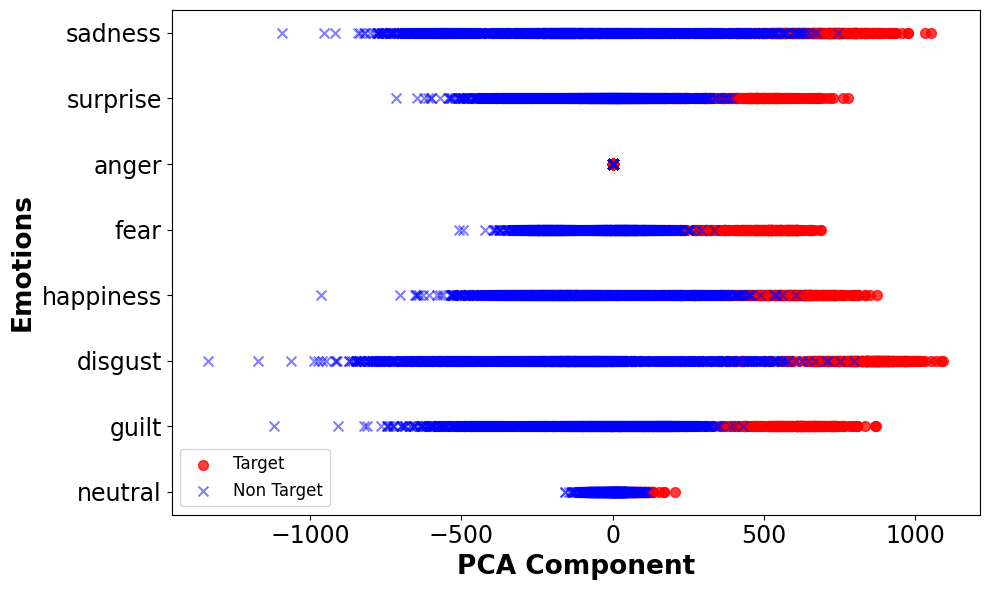

In [74]:
from sklearn.decomposition import PCA
tot = []
dims = []
for n in range(len(tot_t_features)):
    pca_t = PCA(n_components=1)
    dims.append(len(tot_t_features[n]))
    ciolla = np.concatenate([tot_t_features[n], tot_nt_features[n]])
    t_features_pca = pca_t.fit_transform(ciolla)
    t_features_pca = t_features_pca.reshape(ciolla.shape[0], -1)
    tot.append(t_features_pca)
t_features_pca = np.array(tot)

plt.figure(figsize=(10, 6))

for i in range(t_features_pca.shape[0]):
    # Plot the first dims[i] of t_features_pca
    plt.scatter(t_features_pca[i, :dims[i]], [i+1] * len(t_features_pca[0, :dims[i]]), marker="o", color="red", alpha=0.75, label="Target" if i == 0 else "", s=50)

    # Plot the remaining t_features_pca
    plt.scatter(t_features_pca[i, dims[i]:], [i+1] * len(t_features_pca[0, dims[i]:]), marker="x", color="blue", alpha=0.5, label="Non Target" if i == 0 else "", s=50)
    plt.yticks(range(1, t_features_pca.shape[0] + 1), labels=lab)
    plt.tick_params(axis='both', which='major', labelsize=17)
plt.xlabel('PCA Component', fontsize=19, fontweight='bold')
plt.ylabel('Emotions', fontsize=19, fontweight='bold')
# plt.title('Plot of latent space representations of Target and Non-target features', fontsize=18)
plt.legend(prop={'size': 12})
plt.tight_layout()
plt.savefig("DEMOS_LS.png")
plt.show()


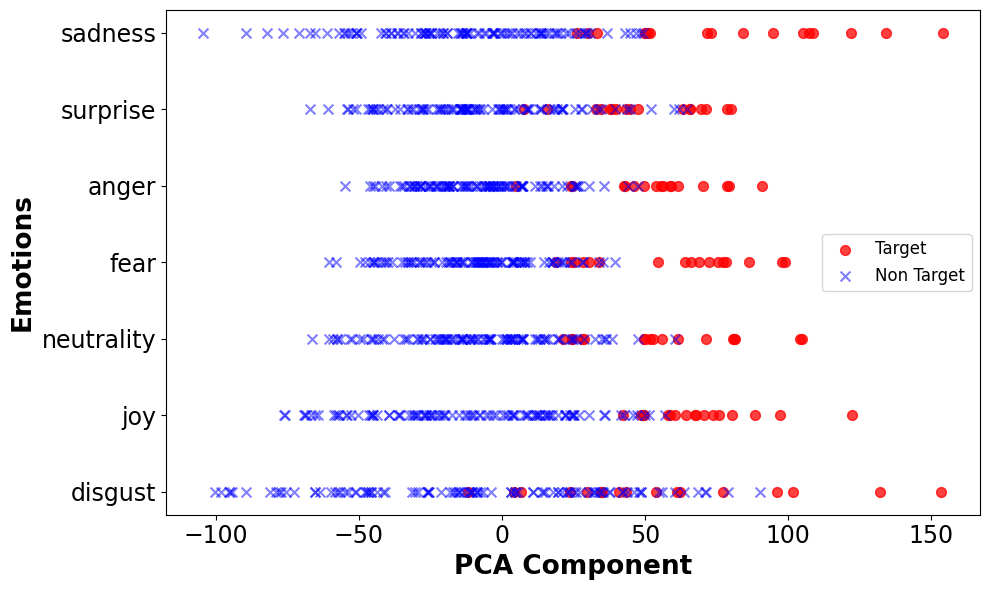

In [55]:
from sklearn.decomposition import PCA
tot = []
dims = []
for n in range(len(tot_t_features)):
    pca_t = PCA(n_components=1)
    dims.append(len(tot_t_features[n]))
    ciolla = np.concatenate([tot_t_features[n], tot_nt_features[n]])
    t_features_pca = pca_t.fit_transform(ciolla)
    t_features_pca = t_features_pca.reshape(ciolla.shape[0], -1)
    tot.append(t_features_pca)
t_features_pca = np.array(tot)

plt.figure(figsize=(10, 6))

for i in range(t_features_pca.shape[0]):
    # Plot the first dims[i] of t_features_pca
    plt.scatter(t_features_pca[i, :dims[i]], [i+1] * len(t_features_pca[0, :dims[i]]), marker="o", color="red", alpha=0.75, label="Target" if i == 0 else "", s=50)

    # Plot the remaining t_features_pca
    plt.scatter(t_features_pca[i, dims[i]:], [i+1] * len(t_features_pca[0, dims[i]:]), marker="x", color="blue", alpha=0.5, label="Non Target" if i == 0 else "", s=50)
    plt.yticks(range(1, t_features_pca.shape[0] + 1), labels=lab)
    plt.tick_params(axis='both', which='major', labelsize=17)
plt.xlabel('PCA Component', fontsize=19, fontweight='bold')
plt.ylabel('Emotions', fontsize=19, fontweight='bold')
# plt.title('Plot of latent space representations of Target and Non-target features', fontsize=18)
plt.legend(prop={'size': 12})
plt.tight_layout()
plt.savefig("EMOVO_LS.png")
plt.show()


In [118]:
tot = []
for n in range(t_features.shape[0]):
    pca_t = PCA(n_components=1)
    t_features_pca = pca_t.fit_transform(t_features[n])
    tot.append(t_features_pca)
t_features_pca = np.array(tot)
# t_features_pca = t_features_pca.reshape(-1,1)

tot = []
for n in range(nt_features.shape[0]):
    pca_t = PCA(n_components=1)
    nt_features_pca = pca_t.fit_transform(nt_features[n])
    tot.append(nt_features_pca)
nt_features_pca = np.array(tot)
# nt_features_pca = nt_features_pca.reshape(-1,1) 

(119, 1)

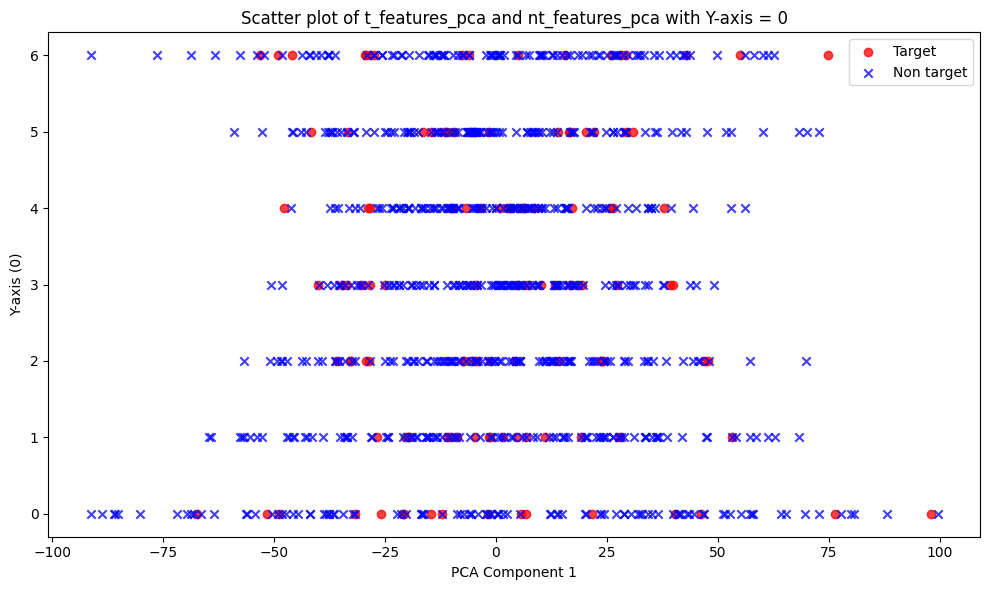

In [121]:
plt.figure(figsize=(10, 6))

# Plot t_features_pca
for i in range(t_features_pca.shape[0]):
    plt.scatter(t_features_pca[i, :], [i] * t_features_pca.shape[1], marker="o", color="red", alpha=0.75, label="Target" if i == 0 else "")

# Plot nt_features_pca
for i in range(nt_features_pca.shape[0]):
    plt.scatter(nt_features_pca[i, :], [i] * nt_features_pca.shape[1], marker="x", color="blue", alpha=0.75, label="Non target" if i == 0 else "")

plt.xlabel('PCA Component 1')
plt.ylabel('Y-axis (0)')
plt.title('Scatter plot of t_features_pca and nt_features_pca with Y-axis = 0')
plt.legend()
plt.tight_layout()
plt.show()


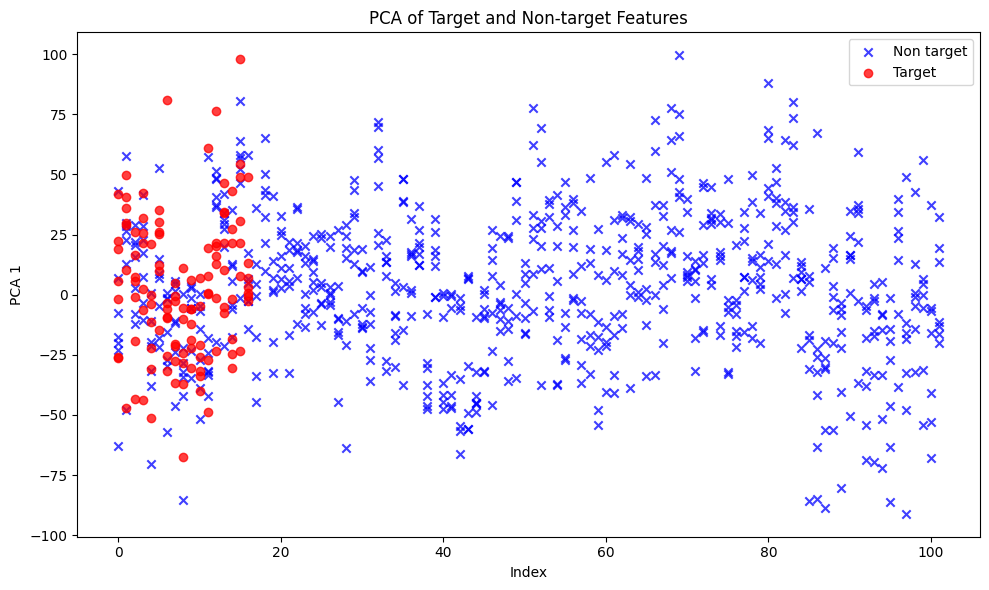

In [88]:
plt.figure(figsize=(10, 6))

# Plot nt_features_pca
for i in range(nt_features_pca.shape[0]):
    plt.scatter(range(nt_features_pca.shape[1]), nt_features_pca[i, :, 0] + i, marker="x", color="blue", alpha=0.75, label="Non target" if i == 0 else "")

# Plot t_features_pca
for i in range(t_features_pca.shape[0]):
    plt.scatter(range(t_features_pca.shape[1]), t_features_pca[i, :, 0] + i, marker="o", color="red", alpha=0.75, label="Target" if i == 0 else "")

plt.xlabel('Index')
plt.ylabel('PCA 1')
plt.title('PCA of Target and Non-target Features')
plt.legend()
plt.tight_layout()
plt.show()

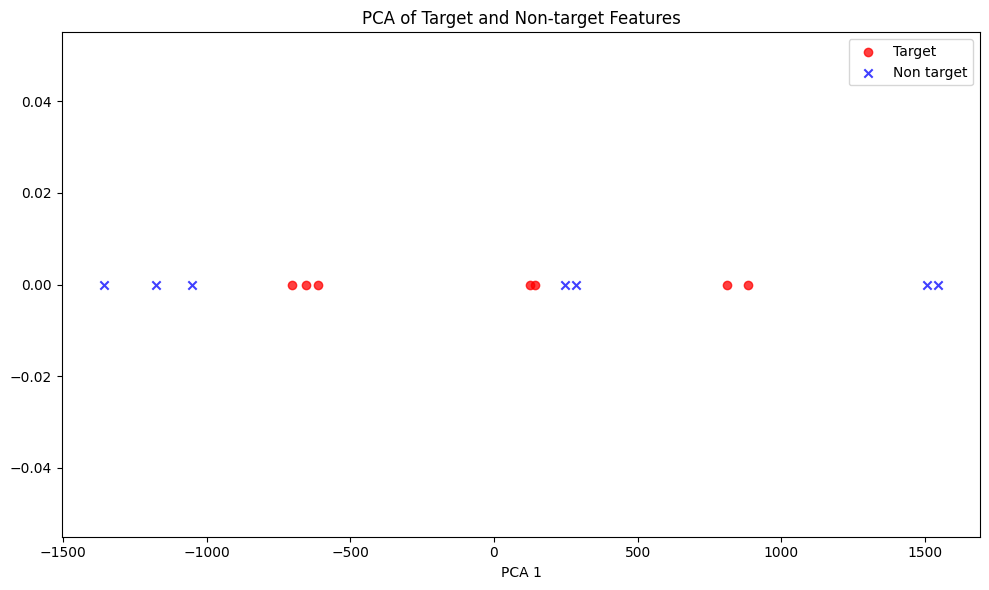

In [77]:
from sklearn.decomposition import PCA

# Reshape t_features and nt_features to 2D arrays for PCA
t_features_reshaped = t_features.reshape(t_features.shape[0], -1)
nt_features_reshaped = nt_features.reshape(nt_features.shape[0], -1)

# Apply PCA with 1 component on t_features
pca_t = PCA(n_components=1)
t_features_pca = pca_t.fit_transform(t_features_reshaped)

# Apply PCA with 1 component on nt_features
pca_nt = PCA(n_components=1)
nt_features_pca = pca_nt.fit_transform(nt_features_reshaped)

# Stack the PCA results together
combined_features_pca = np.vstack((t_features_pca, nt_features_pca))

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(t_features_pca, [0]*len(t_features_pca), marker="o", color="red", alpha=0.75, label="Target")
plt.scatter(nt_features_pca, [0]*len(nt_features_pca), marker="x", color="blue", alpha=0.75, label="Non target")
plt.legend()
plt.xlabel('PCA 1')
plt.title('PCA of Target and Non-target Features')
plt.tight_layout()
plt.show()


In [70]:
nt_features_pca_resh = nt_features_pca.reshape(7,-1,1)
t_features_pca_resh = t_features_pca.reshape(7,-1,1)

In [75]:
nt_features_pca_resh[0]

array([[32.944824],
       [33.189407],
       [30.849426],
       [31.103668],
       [28.761429],
       [33.810013],
       [29.634537],
       [29.3833  ],
       [29.34964 ],
       [27.291306],
       [24.998688],
       [33.789536],
       [32.476166],
       [31.369095],
       [31.418259],
       [35.837326],
       [33.24582 ],
       [24.242691],
       [34.974457],
       [33.54335 ],
       [33.64026 ],
       [27.301506],
       [33.16124 ],
       [30.584427],
       [30.254105],
       [30.937057],
       [31.271652],
       [28.486176],
       [24.807526],
       [32.72873 ],
       [28.109192],
       [28.30819 ],
       [35.46071 ],
       [27.495659],
       [27.055405],
       [24.546288],
       [27.175873],
       [27.993042],
       [23.244827],
       [26.927277],
       [22.49974 ],
       [21.994034],
       [20.814384],
       [21.365868],
       [22.119347],
       [26.28804 ],
       [23.897766],
       [26.78128 ],
       [27.372986],
       [24.729134],


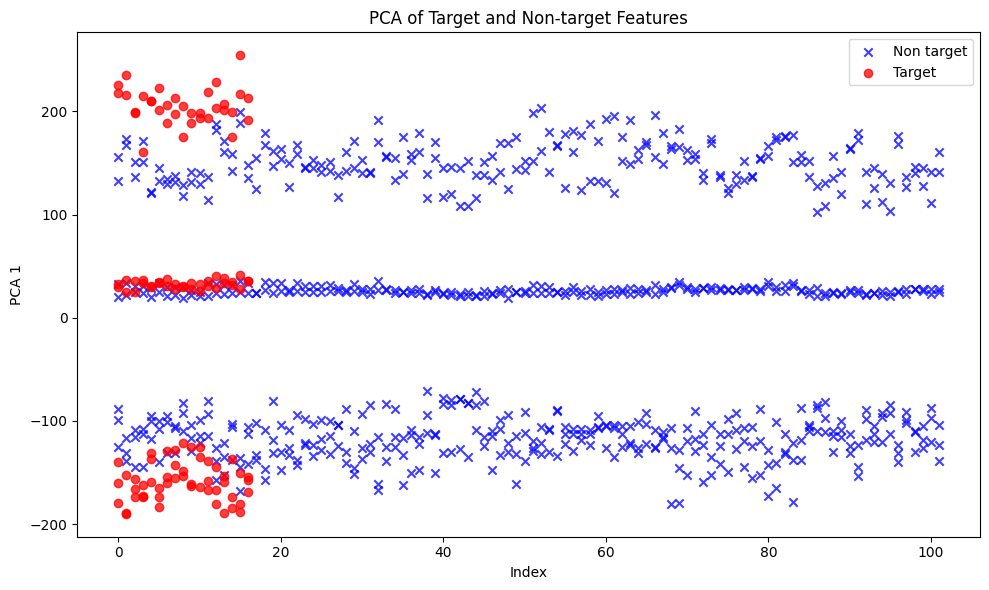

In [71]:
plt.figure(figsize=(10, 6))

# Plot nt_features_pca_resh
for i in range(nt_features_pca_resh.shape[0]):
    plt.scatter(range(nt_features_pca_resh.shape[1]), nt_features_pca_resh[i, :, 0], marker="x", color="blue", alpha=0.75, label="Non target" if i == 0 else "")

# Plot t_features_pca_resh
for i in range(t_features_pca_resh.shape[0]):
    plt.scatter(range(t_features_pca_resh.shape[1]), t_features_pca_resh[i, :, 0], marker="o", color="red", alpha=0.75, label="Target" if i == 0 else "")

plt.xlabel('Index')
plt.ylabel('PCA 1')
plt.title('PCA of Target and Non-target Features')
plt.legend()
plt.tight_layout()
plt.show()

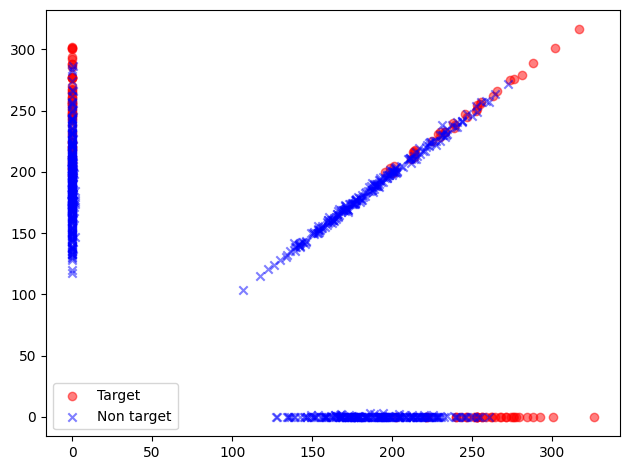

In [32]:
############ RELU
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = t_features.reshape(-1,2)
nt_features = nt_features.reshape(-1,2)

ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.5, label="Target")
ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.5, label="Non target")
plt.legend()
plt.tight_layout()

In [33]:
############ RELU
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = t_features.reshape(-1,2)
nt_features = nt_features.reshape(-1,2)

ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.5, label="Target")
ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.5, label="Non target")
plt.legend()
plt.tight_layout()

(119, 2)

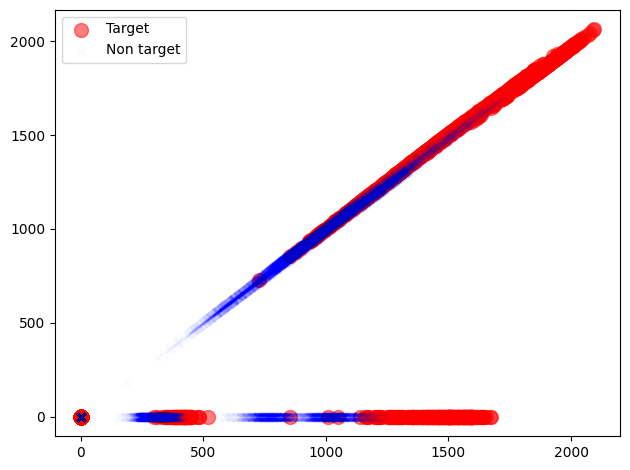

In [23]:
############ SIGMOID
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = t_features.reshape(-1,2)
nt_features = nt_features.reshape(-1,2)

ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.5, label="Target",s=100)
ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.02, label="Non target")
plt.legend()
plt.tight_layout()
plt.savefig("DEMOS_ex")

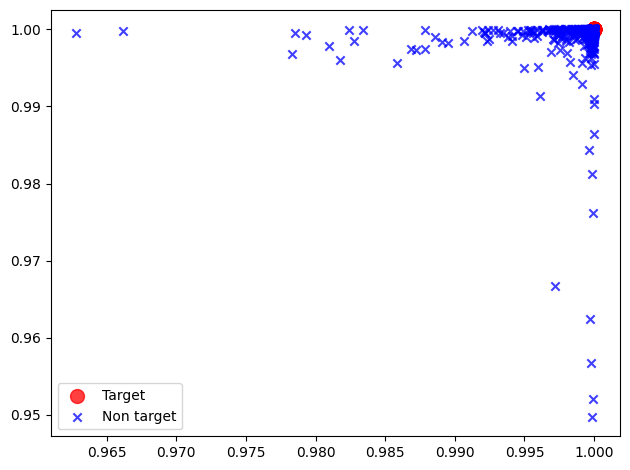

In [60]:
############ SIGMOID
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = t_features.reshape(-1,2)
nt_features = nt_features.reshape(-1,2)

ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.75, label="Target",s=100)
ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.75, label="Non target")
plt.legend()
plt.tight_layout()
plt.savefig("SIGMOID1")

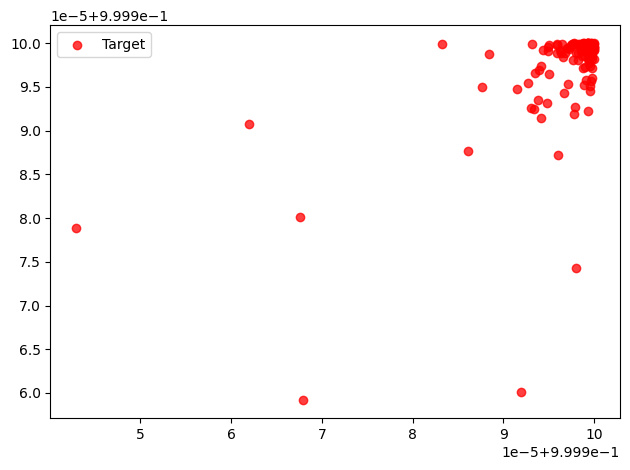

In [ ]:
############ SIGMOID
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = t_features.reshape(-1,2)
nt_features = nt_features.reshape(-1,2)

ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.75, label="Target")
# ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.75, label="Non target")
plt.legend()
plt.tight_layout()
plt.savefig("SIGMOID2")

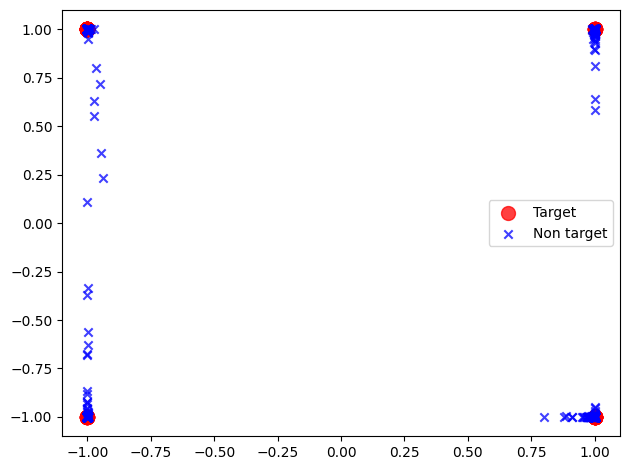

In [67]:
############ TANH
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = t_features.reshape(-1,2)
nt_features = nt_features.reshape(-1,2)

ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.75, label="Target", s=100)
ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.75, label="Non target")
plt.legend()
plt.tight_layout()
plt.savefig("TANH1")


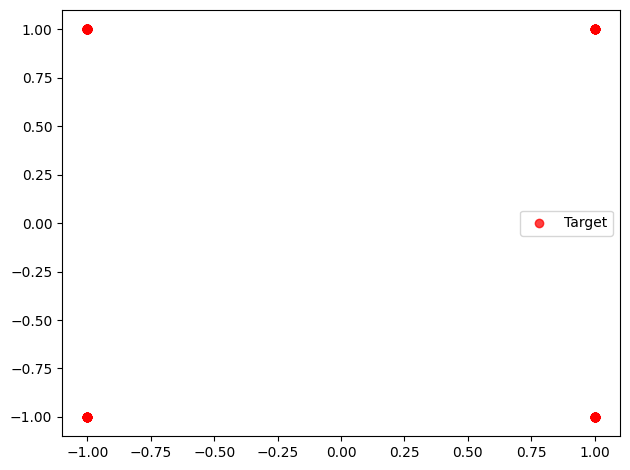

In [68]:
############ TANH
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = t_features.reshape(-1,2)
nt_features = nt_features.reshape(-1,2)

ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.75, label="Target")
# ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.75, label="Non target")
plt.legend()
plt.tight_layout()
plt.savefig("TANH2")

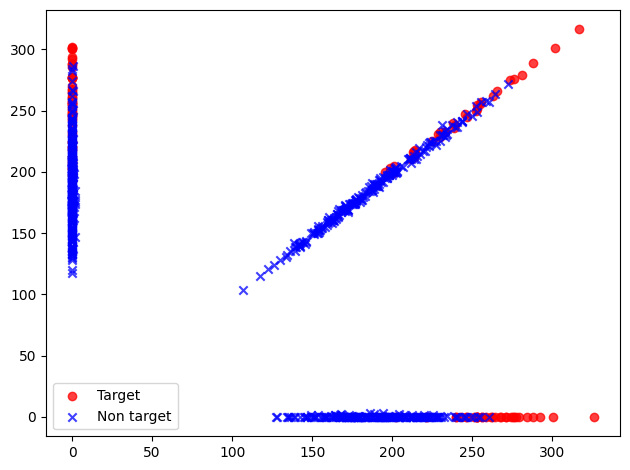

In [88]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = t_features.reshape(-1,2)
nt_features = nt_features.reshape(-1,2)

ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.75, label="Target")
ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.75, label="Non target")
plt.legend()
plt.tight_layout()
# plt.savefig("RELU")

In [86]:
t_features[17:34].

(17, 2)

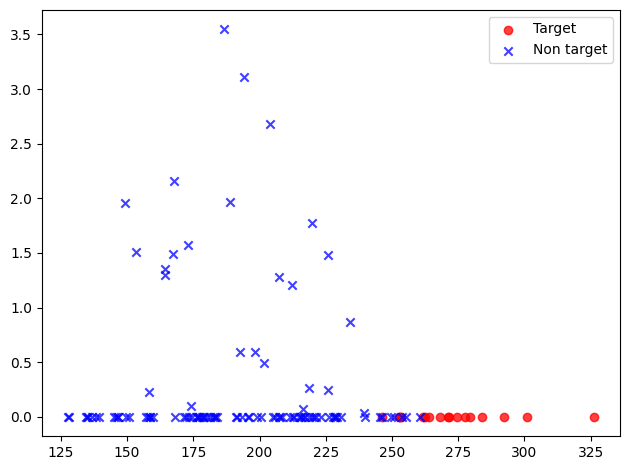

In [90]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = t_features[17:34]
y = nt_features[102:204]
# t_features = t_features.reshape(-1,2)
# nt_features = nt_features.reshape(-1,2)

ax1.scatter(x[:,0], x[:,1], marker="o", color="red", alpha=0.75, label="Target")
ax1.scatter(y[:,0], y[:,1], marker="x", color="blue", alpha=0.75, label="Non target")
plt.legend()
plt.tight_layout()
plt.savefig("RELU_Zoom")

(7, 17, 2)
(7, 102, 2)


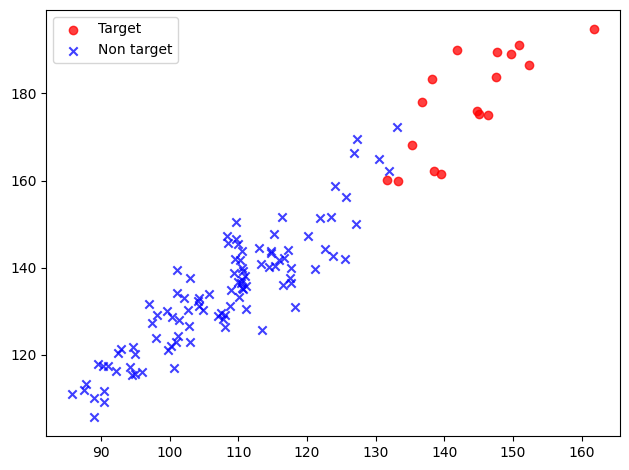

In [55]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = mean_diff(tot_target)
nt_features = mean_diff(tot_non_target)
# t_features = np.concatenate(tot_target, axis=0)
# nt_features = np.concatenate(tot_non_target, axis=0)


ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.75, label="Target")
ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.75, label="Non target")
plt.legend()
plt.tight_layout()
plt.savefig("Confronto_2_neuroni_DEMoS")

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = mean_diff(tot_target)
nt_features = mean_diff(tot_non_target)
# t_features = np.concatenate(tot_target, axis=0)
# nt_features = np.concatenate(tot_non_target, axis=0)


ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.75, label="Target")
ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.75, label="Non target")
plt.legend()
plt.tight_layout()
plt.savefig("Confronto_2_neuroni_DEMoS")

In [75]:
c1 = ["red","orange", "cyan", "blue", "gray", "magenta", "green"]
c2 = ["darkred", "darkorange", "darkcyan", "darkblue", "darkgray", "darkmagenta", "darkgreen"]
['disgust', 'joy', 'neutrality', 'fear', 'anger', 'surprise','sadness']

['disgust', 'joy', 'neutrality', 'fear', 'anger', 'surprise', 'sadness']

In [76]:
t_labels = []
for i in range(len(tot_target)):
    t_labels.extend([c1[i]]* len(tot_target[i]))

nt_labels = []
for i in range(len(tot_non_target)):
    nt_labels.extend([c2[i]]* len(tot_non_target[i]))

In [20]:
17*3

51

In [21]:
tot_non_target[0].shape

(102, 2)

(119, 2)

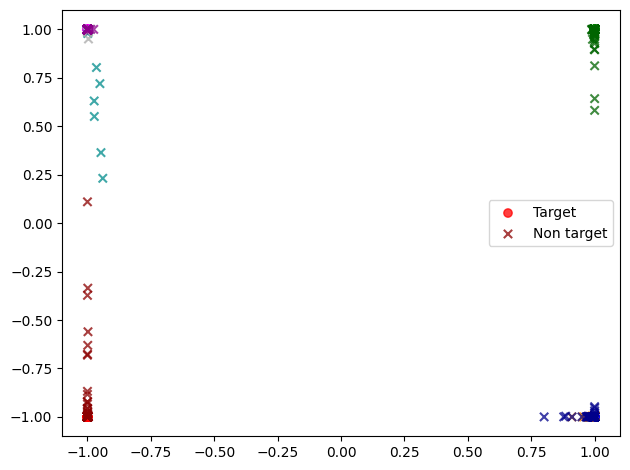

In [77]:
from sklearn.preprocessing import MinMaxScaler
fig = plt.figure()
ax1 = fig.add_subplot(111)
scaler = MinMaxScaler()

t_features = np.concatenate(tot_target,axis=0)
nt_features = np.concatenate(tot_non_target,axis=0)

# t_features = scaler.fit_transform(t_features)
# nt_features = scaler.fit_transform(nt_features)
# t_features = np.concatenate(tot_target, axis=0)
# nt_features = np.concatenate(tot_non_target, axis=0)


ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color=t_labels, alpha=0.75, label="Target")
ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color=nt_labels, alpha=0.75, label="Non target")
plt.legend()
plt.tight_layout()
plt.savefig("Confronto_2_neuroni_EMOVO_tanh")

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 833 samples in 0.000s...
[t-SNE] Computed neighbors for 833 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 833 / 833
[t-SNE] Mean sigma: 9.144123
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.021271
[t-SNE] KL divergence after 5000 iterations: 0.116769


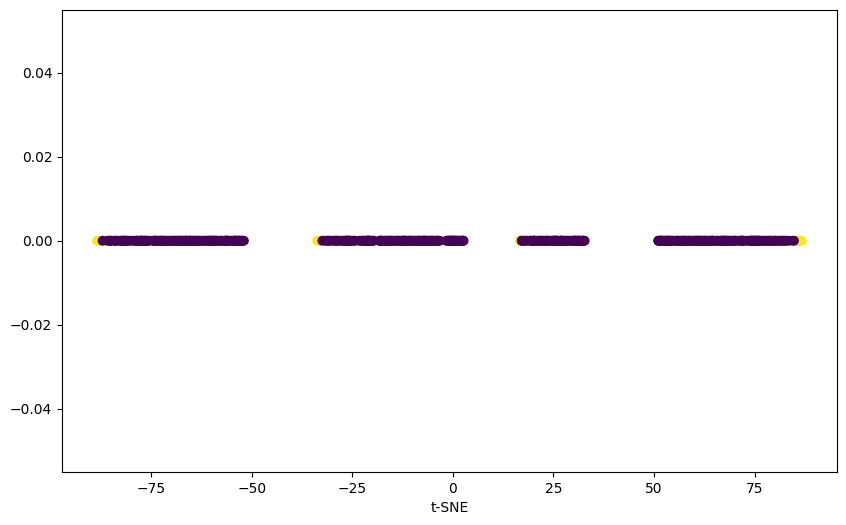

In [26]:
features = np.concatenate([t_features, nt_features])
lab = np.concatenate([[1]*len(t_features), [0]*len(nt_features)])
from sklearn.manifold import TSNE
tsne = TSNE(n_components=1, perplexity=35, learning_rate="auto", init='pca', verbose=True, max_iter=5000)
tsne_features = tsne.fit_transform(features)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features, [0]*(len(tsne_features)),  c=lab, cmap='viridis')
plt.xlabel('t-SNE')
# plt.ylabel('t-SNE')
plt.savefig("tsne_demos")
plt.show()


In [181]:
tsne_features

array([[ 103.73237],
       [ 106.05868],
       [ 109.51485],
       ...,
       [-157.30576],
       [-152.5441 ],
       [-158.4152 ]], dtype=float32)

In [81]:
tot_target = []
tot_non_target = []
for i,features in enumerate(tot_features):
    inizio = i*17
    fine = (i+1)*17
    # print(f"Classe target da {inizio} a {fine}")
    # print(f"Classe non target fino ad {inizio} e da {fine} in poi")

    tot_target.append(features[inizio:fine])
    tot_non_target.append(np.concatenate([features[:inizio] , features[fine:]], axis=0))
    
tot_target = np.array(tot_target)
tot_non_target = np.array(tot_non_target)

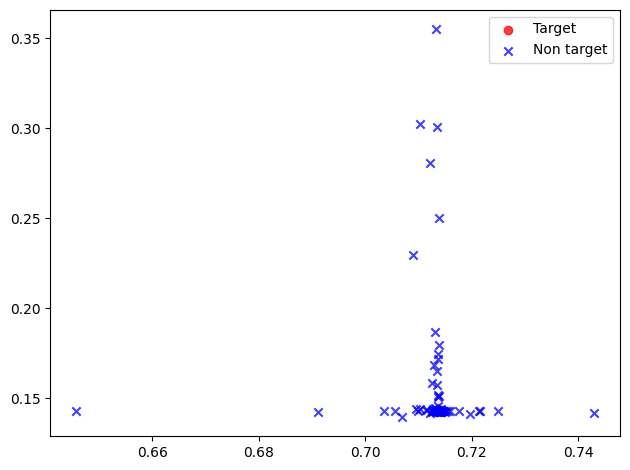

In [82]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = np.mean(tot_target, axis=0)
nt_features = np.mean(tot_non_target, axis=0)


ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.75, label="Target")
ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.75, label="Non target")
plt.legend()
plt.tight_layout()
# plt.savefig("Confronto_2_neuroni")

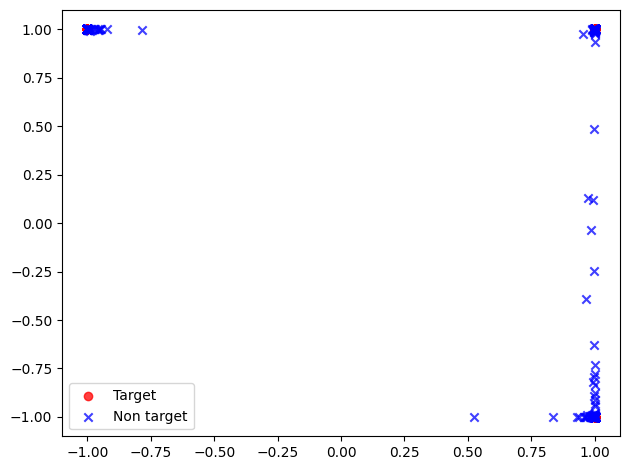

In [83]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

t_features = tot_target.reshape(-1,2)
nt_features = tot_non_target.reshape(-1,2)


ax1.scatter(t_features[:,0], t_features[:,1], marker="o", color="red", alpha=0.75, label="Target")
ax1.scatter(nt_features[:,0], nt_features[:,1], marker="x", color="blue", alpha=0.75, label="Non target")
plt.legend()
plt.tight_layout()
# plt.savefig("Confronto_2_neuroni_")

In [64]:
features = np.concatenate([t_features, nt_features])
lab = np.concatenate([[1]*len(t_features), [0]*len(nt_features)])

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 833 samples in 0.000s...
[t-SNE] Computed neighbors for 833 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 833 / 833
[t-SNE] Mean sigma: 4.979236
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.402802
[t-SNE] KL divergence after 5000 iterations: 0.123509


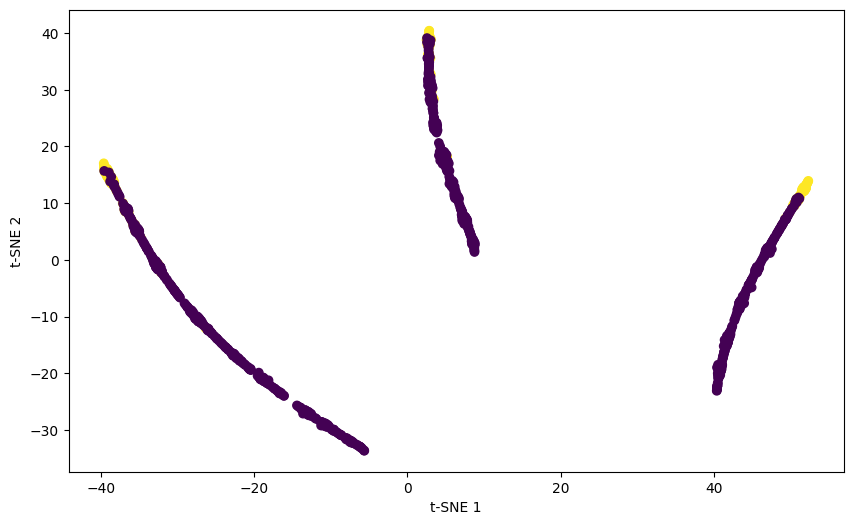

In [65]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=35, learning_rate="auto", init='pca', verbose=True, max_iter=5000)
tsne_features = tsne.fit_transform(features)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=lab, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [14]:
features, _ = get_representations(0, encoders, test)
feat = features.reshape(-1,17,28)
totale = []
for n in range(len(feat)):
    tot_diffs = []
    for i in range(len(feat[n])):
        data = feat[n][i]
        diffs = []
        for j in range(len(feat)):
                for k in range(len(feat[j])):
                    diffs.append(np.linalg.norm(data.reshape(-1,1)- feat[j][k].reshape(-1,1), axis=1)) #distanza euclidea 
        tot_diffs.append(diffs)
    tot_diffs = np.array(tot_diffs)
    totale.append(tot_diffs)
totale = np.array(totale)
media = np.mean(totale, axis=3)


In [31]:
totale.shape

(7, 17, 119, 28)

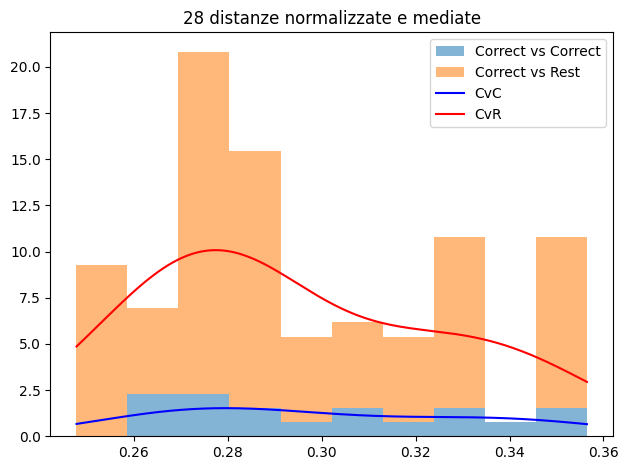

In [35]:
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

a = totale[0,:,:,:]
a_in = a[0,:,:]
scaled = []
scaler = MinMaxScaler()

total_c = []
for i in range((a.shape[-1])):
    scaled.append(scaler.fit(a[:,:,i]).transform(a[:,:,i]))
scaled= np.array(scaled)
a_c = scaled[:,:,:17]
a_n = scaled[:,:,17:]

x = np.mean(np.mean(a_c, axis=0),axis=1)
y = np.mean(np.mean(a_n, axis=0),axis=1)
x_w = np.empty(x.shape)
x_w.fill((17/119)/x.shape[0])
y_w = np.empty(y.shape)
y_w.fill((102/119)/y.shape[0])
# print(x.shape)

num_bins = 500  # Number of bins
common_bins = np.linspace(min(np.min(x), np.min(y)), max(np.max(x), np.max(y)), num_bins + 1)
bin_centers = 0.5 * (common_bins[:-1] + common_bins[1:])  # Compute bin centers

# Plot stacked histogram with common bins
plt.hist(
    [x, y],
    weights=[x_w, y_w],
    alpha=0.55,
    histtype="barstacked",
    density=True,
    label=["Correct vs Correct", "Correct vs Rest"],
)

# Evaluate and plot KDE for x
kde_x = stats.gaussian_kde(x)
kde_x_values = kde_x(bin_centers) * (17/119)
plt.plot(bin_centers, kde_x_values, label="CvC", color="blue")

# Evaluate and plot KDE for y
kde_y = stats.gaussian_kde(y)
kde_y_values = kde_y(bin_centers) * (102/119)
plt.plot(bin_centers, kde_y_values, label="CvR", color="red")

# Add labels and legend
plt.legend()

plt.title("28 distanze normalizzate e mediate")
plt.tight_layout()
plt.savefig("Emo0_vs_all_28f_norm")

plt.show()

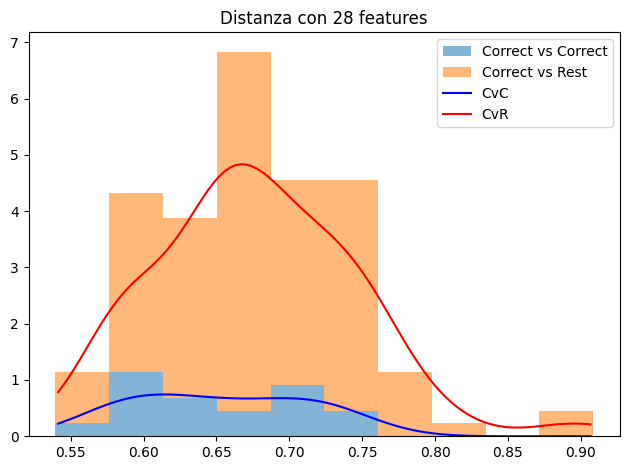

In [34]:
a = media.reshape(7,17,7,-1)
from scipy import stats
a_c = a[0,:,0]
a_n = a[0,:,1:]
x = np.mean(a_c, axis=0)
y = np.mean(a_n.reshape(17,-1),axis=0)
x_w = np.empty(x.shape)
x_w.fill((17/119)/x.shape[0])
y_w = np.empty(y.shape)
y_w.fill((102/119)/y.shape[0])

num_bins = 100  # Number of bins
common_bins = np.linspace(min(np.min(x), np.min(y)), max(np.max(x), np.max(y)), num_bins + 1)
bin_centers = 0.5 * (common_bins[:-1] + common_bins[1:])  # Compute bin centers

# Plot stacked histogram with common bins
plt.hist(
    [x, y],
    weights=[x_w, y_w],
    alpha=0.55,
    histtype="barstacked",
    density=True,
    label=["Correct vs Correct", "Correct vs Rest"],
)

# Evaluate and plot KDE for x
kde_x = stats.gaussian_kde(x)
kde_x_values = kde_x(bin_centers) * (17 / 119)
plt.plot(bin_centers, kde_x_values, label="CvC", color="blue")

# Evaluate and plot KDE for y
kde_y = stats.gaussian_kde(y)
kde_y_values = kde_y(bin_centers) * (102 / 119)
plt.plot(bin_centers, kde_y_values, label="CvR", color="red")

# Add labels and legend
plt.legend()

plt.title("Distanza con 28 features")
plt.tight_layout()
plt.savefig("Emo0_vs_all_28f")

plt.show()

In [15]:
features, _ = get_representations(0, encoders, test)
feat = features.reshape(-1,17,28)
totale = []
for n in range(len(feat)):
    tot_diffs = []
    for i in range(len(feat[n])):
        data = feat[n][i]
        diffs = []
        for j in range(len(feat)):
                for k in range(len(feat[j])):
                    diffs.append(np.linalg.norm(data - feat[j][k])) #distanza euclidea 
        tot_diffs.append(diffs)
    tot_diffs = np.array(tot_diffs)
    totale.append(tot_diffs)
totale = np.array(totale)
a = totale.reshape(7,17,7,-1)

In [ ]:
a = a[0,:,:,:]



In [21]:
a.shape

(17, 7, 17)

In [22]:
a_c = a[:,0,:]
a_n = a[:,1:,:]

In [25]:
a_n = a_n.reshape(17,-1)

In [31]:
x = a_c.reshape(-1,1)
y = a_n.reshape(-1,1)

In [40]:
x_w = np.empty(x.shape)
x_w.fill((17/119)/x.shape[0])
y_w = np.empty(y.shape)
y_w.fill((102/119)/y.shape[0])

In [47]:
np.sum(x_w) + np.sum(y_w)

1.0000000000000002

(array([0.01186357, 0.05239743, 0.09293129, 0.12901631, 0.15570934,
        0.1799308 , 0.14928324, 0.05882353, 0.02372714, 0.00346021]),
 array([1.31655014, 2.13761783, 2.95868564, 3.77975321, 4.60082102,
        5.42188883, 6.24295664, 7.06402445, 7.88509178, 8.70615959,
        9.5272274 ]),
 <BarContainer object of 10 artists>)

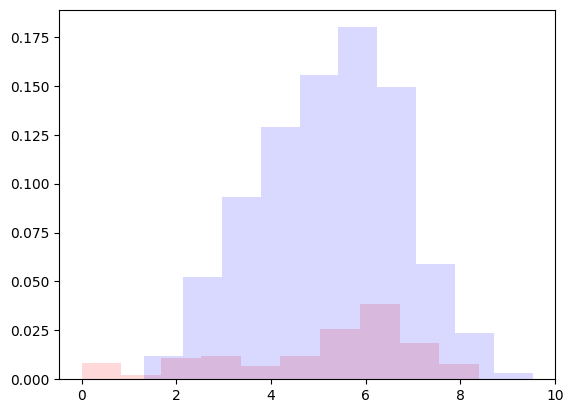

In [42]:
plt.hist(x, weights=x_w, color="red", alpha=0.15)
plt.hist(y, weights=y_w, color="blue", alpha=0.15)

ValueError: x must have 2 or fewer dimensions

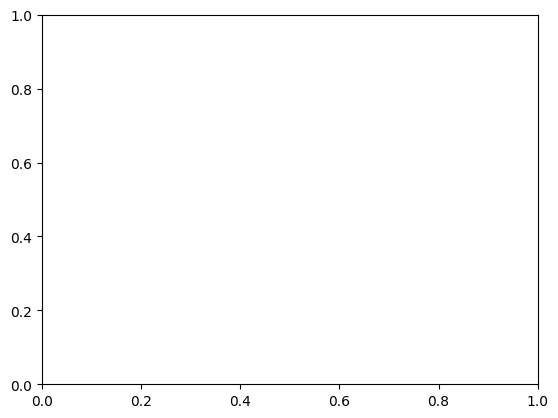

In [32]:
x_w = np.empty(a_c.shape)
x_w.fill((17/119)/a_c.shape[0])
y_w = np.empty(a_n.shape)
y_w.fill((102/119)/a_n.shape[0])


num_bins = 100  # Number of bins
common_bins = np.linspace(min(np.min(x), np.min(y)), max(np.max(x), np.max(y)), num_bins + 1)
bin_centers = 0.5 * (common_bins[:-1] + common_bins[1:])  # Compute bin centers

# Plot stacked histogram with common bins
plt.hist(
    [x, y],
    weights=[x_w, y_w],
    alpha=0.55,
    histtype="barstacked",
    density=True,

    label=["Correct vs Correct", "Correct vs Rest"],
)

# Evaluate and plot KDE for x
kde_x = stats.gaussian_kde(x)
kde_x_values = kde_x(bin_centers) * (17 / 119)
plt.plot(bin_centers, kde_x_values, label="CvC", color="blue")

# Evaluate and plot KDE for y
kde_y = stats.gaussian_kde(y)
kde_y_values = kde_y(bin_centers) * (102/119)
plt.plot(bin_centers, kde_y_values, label="CvR", color="red")

# Add labels and legend
plt.legend()

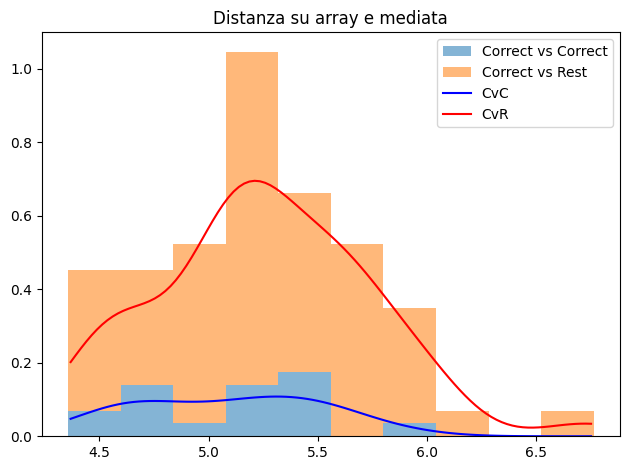

In [ ]:
from scipy import stats
a_c = a[0,:,0]
a_n = a[0,:,1:]
x = np.mean(a_c, axis=0)
y = np.mean(a_n.reshape(17,-1),axis=0)
x_w = np.empty(x.shape)
x_w.fill((17/119)/x.shape[0])
y_w = np.empty(y.shape)
y_w.fill((102/119)/y.shape[0])


num_bins = 100  # Number of bins
common_bins = np.linspace(min(np.min(x), np.min(y)), max(np.max(x), np.max(y)), num_bins + 1)
bin_centers = 0.5 * (common_bins[:-1] + common_bins[1:])  # Compute bin centers

# Plot stacked histogram with common bins
plt.hist(
    [x, y],
    weights=[x_w, y_w],
    alpha=0.55,
    histtype="barstacked",
    density=True,

    label=["Correct vs Correct", "Correct vs Rest"],
)

# Evaluate and plot KDE for x
kde_x = stats.gaussian_kde(x)
kde_x_values = kde_x(bin_centers) * (17 / 119)
plt.plot(bin_centers, kde_x_values, label="CvC", color="blue")

# Evaluate and plot KDE for y
kde_y = stats.gaussian_kde(y)
kde_y_values = kde_y(bin_centers) * (102/119)
plt.plot(bin_centers, kde_y_values, label="CvR", color="red")

# Add labels and legend
plt.legend()

plt.title("Distanza su array e mediata")
plt.tight_layout()
plt.savefig("Emo0_vs_all")
plt.show()

(7, 17)
(7, 17)
(7, 17)
(7, 17)
(7, 17)
(7, 17)
(7, 17)


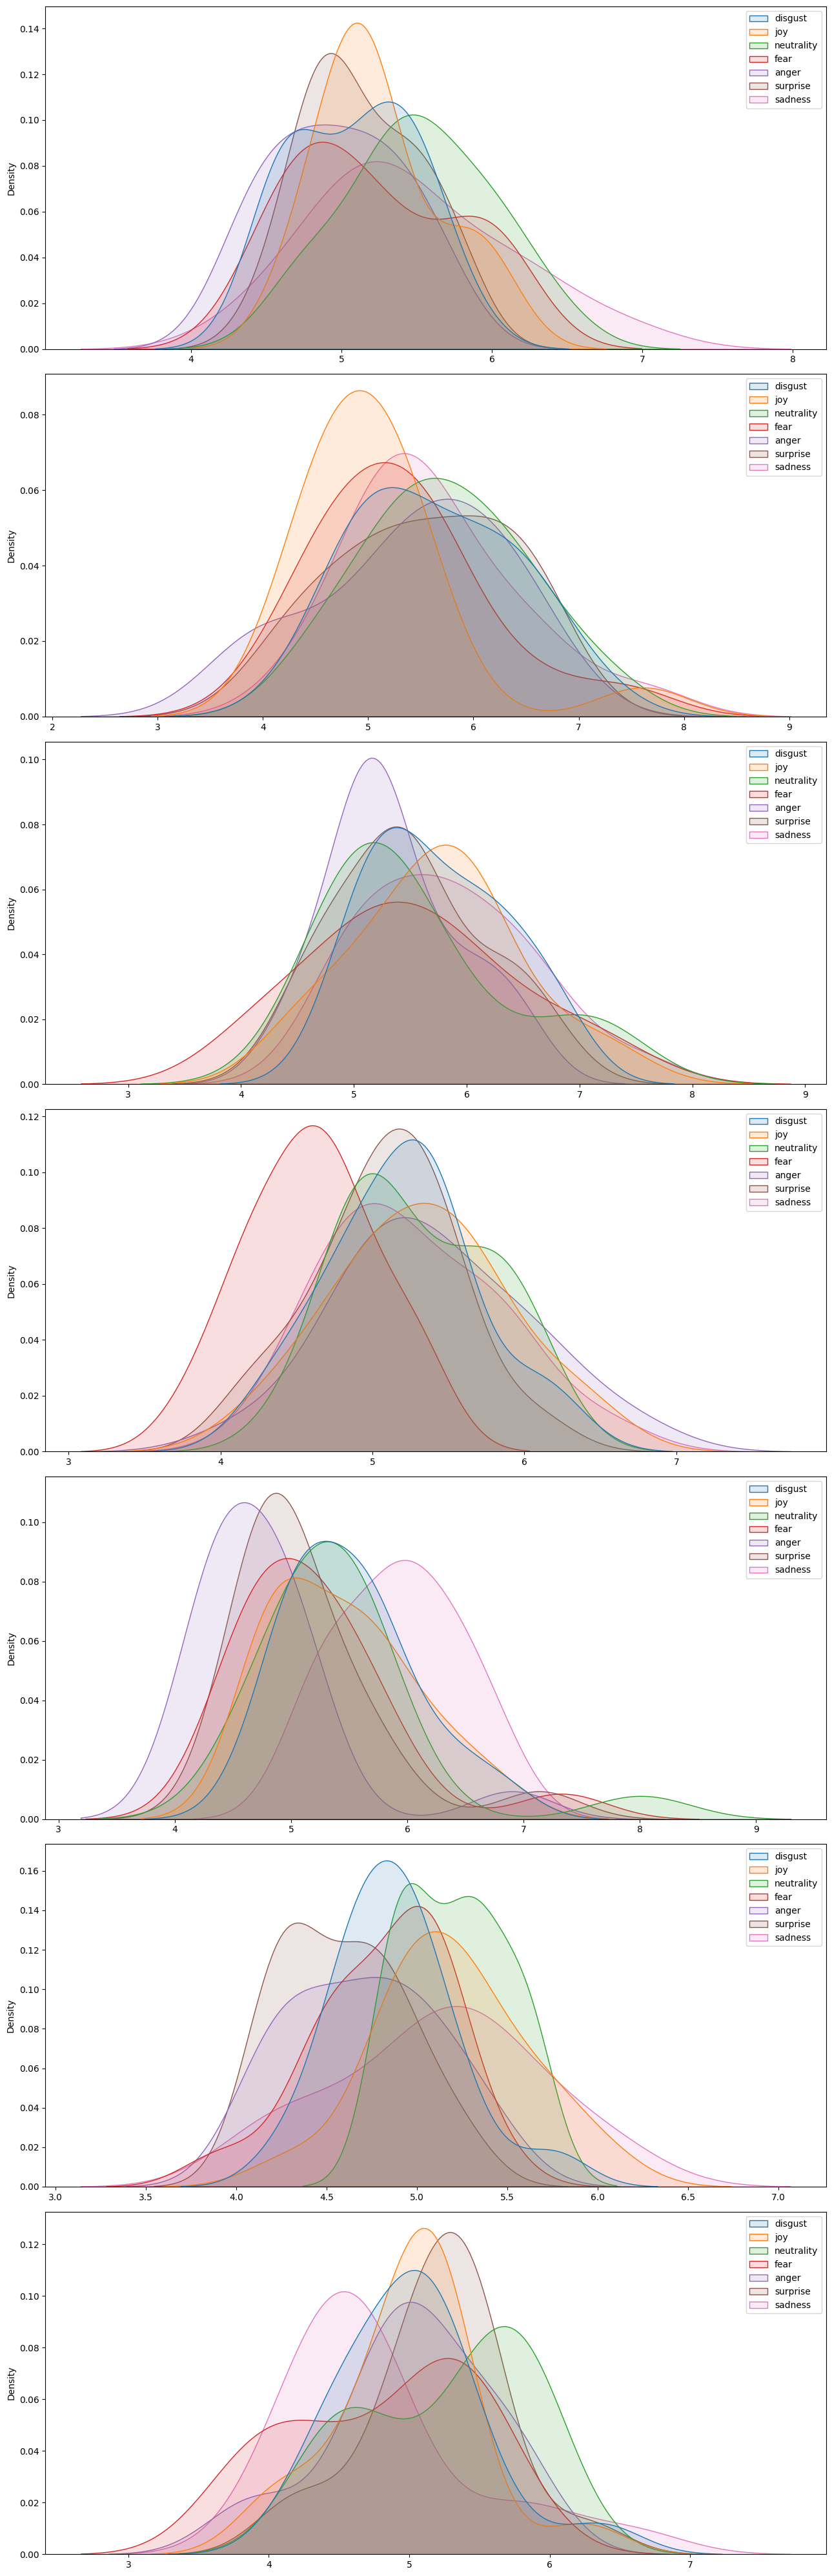

In [60]:
fig, axes = plt.subplots(ncols=1, nrows=len(encoders), figsize=(1 * 13, 8 * 5))
for x in range(len(encoders)):
    features, _ = get_representations(x)
    feat = features.reshape(-1,17,28)
    totale = []
    for n in range(len(feat)):
        tot_diffs = []
        for i in range(len(feat[n])):
            data = feat[n][i]
            diffs = []
            for j in range(len(feat)):
                    for k in range(len(feat[j])):
                # if i != j:
                        diffs.append(np.linalg.norm(data - feat[j][k])) #distanza euclidea 
                    
            tot_diffs.append(diffs)
        tot_diffs = np.array(tot_diffs)
        totale.append(tot_diffs)
    totale = np.array(totale)
    totale.reshape(7,-1)
    normal = []
    #normalizzo 
    for i in range(totale.shape[0]):
        normal.append(np.mean(totale[i], axis=0))
    normal = np.array(normal)
    print(normal.shape)
    df = pd.DataFrame(normal.T, columns=labels)
    sns.kdeplot(data=df, fill=True, bw_adjust=1, alpha=.15, ax=axes[x])
    plt.tight_layout()
    plt.savefig("Distribuzioni_errori")

In [39]:
np.mean(totale[0], axis=0)

array([4.562588 , 5.1534424, 4.5605474, 4.6886435, 4.5116453, 5.757471 ,
       5.661395 , 5.0823507, 4.6409216, 5.150961 , 5.9822145, 4.332301 ,
       4.774912 , 4.7857094, 5.1822805, 5.133714 ], dtype=float32)

In [40]:
for i in range(totale.shape[0]):
    normal.append(np.mean(totale[i], axis=0))
    # normal.append(np.mean(totale[i], axis=0))
normal = np.array(normal)
print(normal.shape)
df = pd.DataFrame(normal.T)
sns.kdeplot(data=df, fill=True, bw_adjust=1, alpha=.15, ax=axes[x])
plt.tight_layout()
plt.savefig("Distribuzioni_errori")

(7, 16)


<Figure size 640x480 with 0 Axes>

In [19]:
df

0         1         2         3         4         5    6
0   0.456046  0.574320  0.501917  0.503653  0.431557  0.478259  0.5
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0
3   0.478965  0.490053  0.439495  0.450156  0.410762  0.472202  0.5
4   0.493215  0.491719  0.548647  0.494124  0.547688  0.468948  0.5
5   0.589905  0.588503  0.585777  0.615231  0.587762  0.584773  0.5
6   0.000000  0.000000  0.058824  0.058824  0.000000  0.000000  0.0
7   0.524403  0.429338  0.517442  0.472580  0.457212  0.483397  0.5
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0
10  0.530407  0.514304  0.504923  0.554876  0.545491  0.516874  0.5
11  0.000000  0.058824  0.000000  0.000000  0.000000  0.000000  0.0
12  0.505225  0.497378  0.352596  0.393878  0.357632  0.513996  0.5
13  0.528683  0.522840  0.440066  0.429977  0.472063  0.489559  0.5
14  0.536682  0.475917  0.617997  0.505387  0.604886  0.492259  0.5
15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0
16  0.531798  0.427826  0.533996  0.545995  0.506939  0.406068  0.5
17  0.462982  0.460840  0.532988  0.464614  0.463280  0.468102  0.5
18  0.465558  0.427282  0.500521  0.559980  0.456664  0.403614  0.5
19  0.609268  0.618744  0.610863  0.611817  0.593037  0.546102  0.5
20  0.550191  0.573652  0.647706  0.589954  0.656877  0.577891  0.5
21  0.000000  0.095901  0.000000  0.000000  0.058824  0.000000  0.0
22  0.532447  0.528581  0.548267  0.529598  0.600368  0.570215  0.5
23  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0
24  0.518026  0.524346  0.549419  0.532969  0.556031  0.540332  0.5
25  0.371930  0.445105  0.446158  0.429819  0.398947  0.434071  0.5
26  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0
27  0.430594  0.452294  0.457464  0.460893  0.492919  0.476937  0.5

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6974 samples in 0.003s...
[t-SNE] Computed neighbors for 6974 samples in 0.385s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6974
[t-SNE] Computed conditional probabilities for sample 2000 / 6974
[t-SNE] Computed conditional probabilities for sample 3000 / 6974
[t-SNE] Computed conditional probabilities for sample 4000 / 6974
[t-SNE] Computed conditional probabilities for sample 5000 / 6974
[t-SNE] Computed conditional probabilities for sample 6000 / 6974
[t-SNE] Computed conditional probabilities for sample 6974 / 6974
[t-SNE] Mean sigma: 0.604311
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.928482
[t-SNE] KL divergence after 5000 iterations: 2.185427


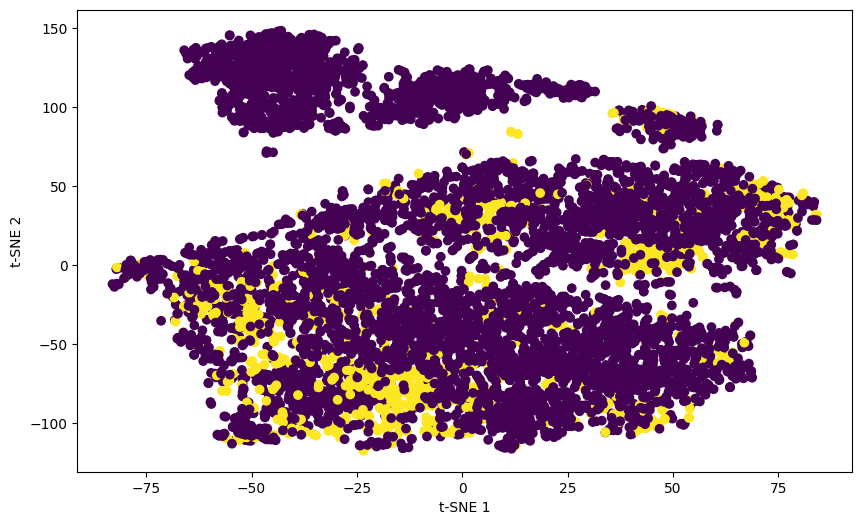

In [34]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate="auto", init='random', verbose=True, max_iter=5000)
tsne_features = tsne.fit_transform(features)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 419 samples in 0.000s...
[t-SNE] Computed neighbors for 419 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 419 / 419
[t-SNE] Mean sigma: 1.095173
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.075794
[t-SNE] KL divergence after 1500 iterations: 0.546335


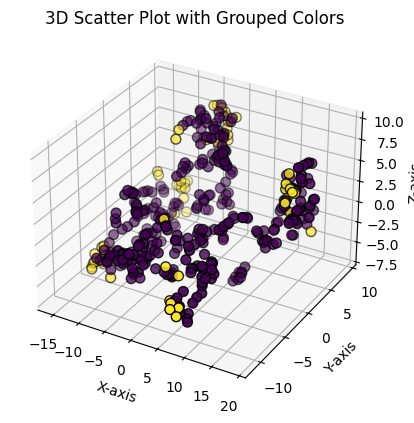

In [53]:
tsne = TSNE(n_components=3, perplexity=15, learning_rate="auto", init='pca', verbose=True, max_iter=2000, n_iter_without_progress=300)
tsne_features = tsne.fit_transform(features)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded points
ax.scatter(tsne_features[:, 0], tsne_features[:, 1], tsne_features[:, 2], c=labels, s=50, edgecolors='black')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot with Grouped Colors')

plt.show()

In [ ]:
tsne = TSNE(n_components=1, perplexity=30, learning_rate=500, init='random', verbose=True, max_iter=10000)
tsne_features = tsne.fit_transform(features)
plt.figure(figsize=(10, 6))
plt.plot(tsne_features, list(range(len(tsne_features))), 'x')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6974 samples in 0.000s...
[t-SNE] Computed neighbors for 6974 samples in 0.215s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6974
[t-SNE] Computed conditional probabilities for sample 2000 / 6974
[t-SNE] Computed conditional probabilities for sample 3000 / 6974
[t-SNE] Computed conditional probabilities for sample 4000 / 6974
[t-SNE] Computed conditional probabilities for sample 5000 / 6974
[t-SNE] Computed conditional probabilities for sample 6000 / 6974
[t-SNE] Computed conditional probabilities for sample 6974 / 6974
[t-SNE] Mean sigma: 0.604311
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.958389


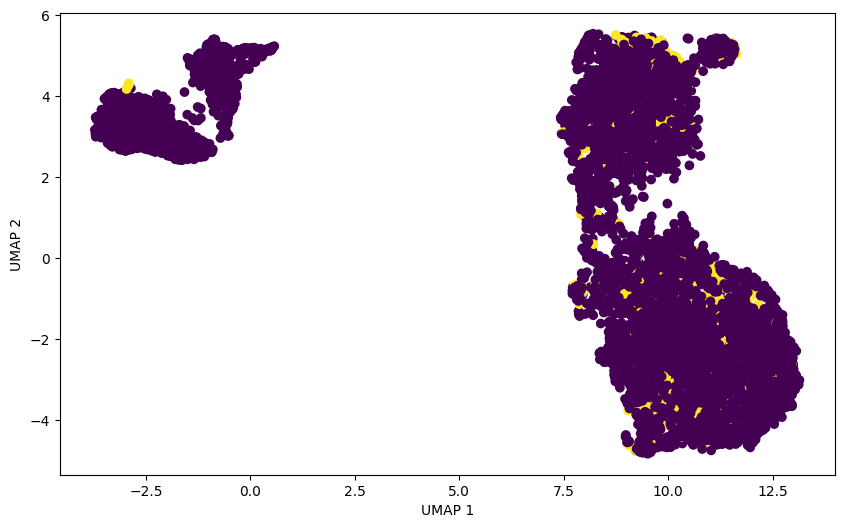

In [95]:
import umap

reducer = umap.UMAP()

embedding = reducer.fit_transform(features)

plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

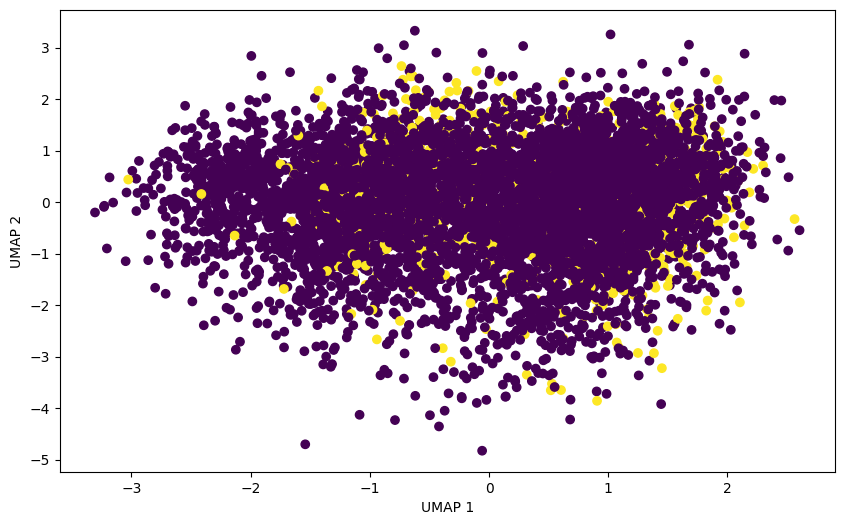

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding = pca.fit_transform(features)


plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


In [90]:
tot_features = []
tot_labels = []
for i in range(len(encoders)):
    features, labels = get_representations(i, encoders, test)
    tot_features.append(features)
    tot_labels.append(labels)
# feat = features.reshape(-1,17,2)
tot_target = []
tot_non_target = []

for i in range(len(tot_features)): 

    data_array = tot_features[i]
    mask_array = tot_labels[i]

    tot_target.append(data_array[mask_array == 1])
    tot_non_target.append(data_array[~(mask_array == 1)])

t_features = np.concatenate(tot_target,axis=0)
nt_features = np.concatenate(tot_non_target,axis=0)

# tot_target = np.array(tot_target)
# tot_non_target = np.array(tot_non_target)

In [92]:
t_features = tot_target[0]
nt_features = tot_non_target[0]

In [83]:
features = np.concatenate([t_features, nt_features], axis=1)
lab = np.concatenate([[1]*(t_features).shape[1], [0]*(nt_features).shape[1]])

In [84]:
lab = np.stack([[lab]*7]).reshape(7,119)

(17, 28)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 119 samples in 0.001s...
[t-SNE] Computed neighbors for 119 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 119 / 119
[t-SNE] Mean sigma: 1.055301
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.220673
[t-SNE] KL divergence after 5000 iterations: 0.436798


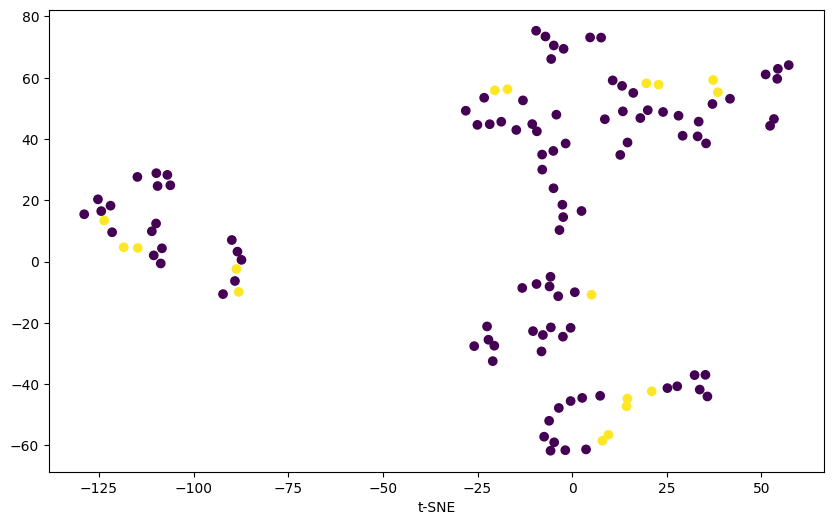

In [96]:
features = np.concatenate([t_features, nt_features], axis=0)
lab = np.concatenate([[1]*len(t_features), [0]*len(nt_features)])
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=5, learning_rate="auto", init='random', verbose=True, max_iter=5000)
tsne_features = tsne.fit_transform(features)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:,0], tsne_features[:,1],  c=lab, cmap='viridis')
plt.xlabel('t-SNE')
# plt.ylabel('t-SNE')
# plt.savefig("tsne_demos")
plt.show()


(7, 119, 28)

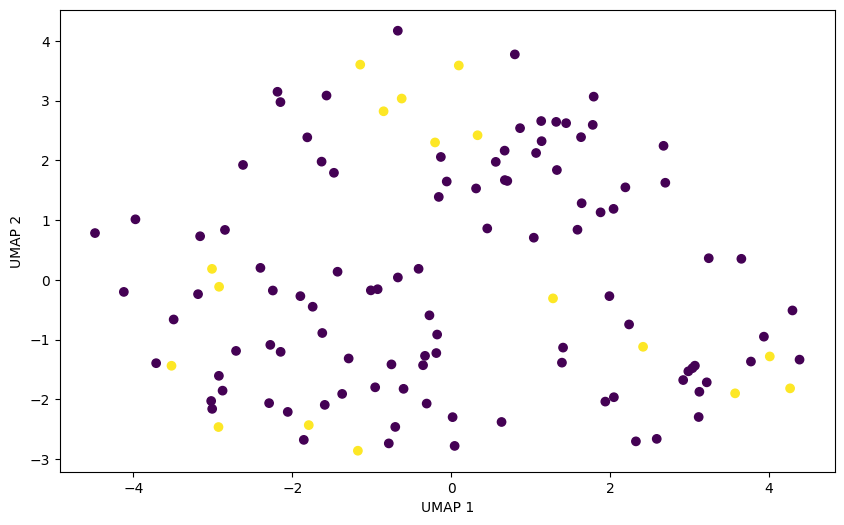

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding = pca.fit_transform(features)


plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=lab, cmap='viridis')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

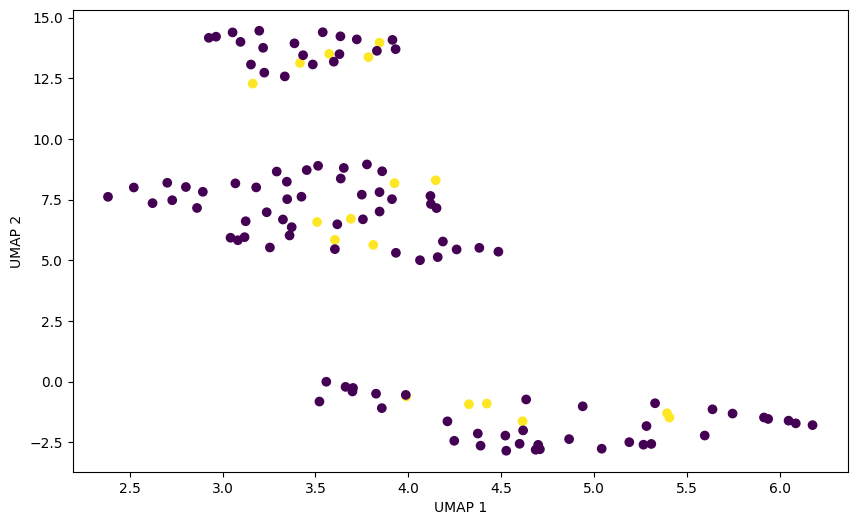

In [98]:
import umap

reducer = umap.UMAP()

embedding = reducer.fit_transform(features)

plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=lab, cmap='viridis')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()